# Creating Machine Learning Models to Predict Housing Prices in Ames, Iowa

### Contents

 - I.  [METHOD: Using HyperTransformation Tuning and ML Model Ensembling ](#METHOD:-Using-HyperTransformation-Tuning-and-ML-Model-Ensembling )
     - [HyperTransformation Tuning - A New Machine Learning Optimization Approach](#HyperTransformation-Tuning---A-New-Machine-Learning-Optimization-Approach)
     - [Machine Learning Model Ensembling](#Machine-Learning-Model-Ensembling)
 - II. [Dataset Preparation for Machine Learning](#Dataset-Preparation-for-Machine-Learning)
     - [Load Data from Preprocessing and Create 80/20 Training/Test Splits for all 6 Datasets¶](#Load-Data-from-Preprocessing-and-Create-80/20-Training/Test-Splits-for-all-6-Datasets¶)
     - [Barebones Run](#Barebones-Run)
 - III. [HyperTransformation Tuning 2: Scaled and Log Transformations](#HyperTransformation-Tuning-2:-Scaled-and-Log-Transformations)
 - IV. [HyperTransformation Pruning #1](#HyperTransformation-Pruning-#1)
 - V.  [HyperTransformation Tuning 3: PCA Transformations](#HyperTransformation-Tuning-3:-PCA-Transformations)
     - [Best PCA Models](#Best-PCA-Models)
     - [Best Dataset Transformations For All 10 Models So Far](#Best-Dataset-Transformations-For-All-10-Models-So-Far)
 - VI.  [HyperTransformation Tuning 4: Dimension Reduction](#HyperTransformation-Tuning-4:-Dimension-Reduction)
     - [Lasso Lambda Coefficient Filter](#Lasso-Lambda-Coefficient-Filter)
     - [Random Forest Feature Importance Filter](#Random-Forest-Feature-Importance-Filter)
     - [XGBoost Feature Importance Filter](#XGBoost-Feature-Importance-Filter)
     - [Ridge Permutation Importance Filter](#Ridge-Permutation-Importance-Filter)
     - [Creating an Average Importance Rank Filter](#Creating-an-Average-Importance-Rank-Filter)
     - [Best Dimension Reduction Models](#Best-Dimension-Reduction-Models)
 - VII. [Does HyperParameter Tuning Still Have Value?](#Does-HyperParameter-Tuning-Still-Have-Value?)
     - [HyperParameter Tuning vs. HyperTransformation Tuning Conclusions](#HyperParameter-Tuning-vs.-HyperTransformation-Tuning-Conclusions)
 - VIII. [Statistical Analysis](#Statistical-Analysis) 
     - [Did HyperTransformation Tuning + Ensembling Work?](#Did-HyperTransformation-Tuning-+-Ensembling-Work?)

# METHOD: Using HyperTransformation Tuning and ML Model Ensembling 
[Back to Top](#Contents)
### My goal in this project is to find ways to test many different approaches to data transformation and machine learning tools in order to find the best possible predictive regression model. 

## HyperTransformation Tuning - A New Machine Learning Optimization Approach
HyperTransformation Tuning is a method I developed that involves testing different transformed versions of the input data against a static Machine Learning model - or several models. This approach is faster and less expensive than HyperParameter Tuning, as most ML models are optimized to their default settings, and transformations are faster to execute than running machine learning models over and over. Furthermore, the outputs from this process can be used with a wide array of machine learning models and methods, unlike HyperParameter Tuning, whose results are limited to single model. This allows greater flexibility and saves needless hours waiting for HyperParameter Tuning to conclude.

In the Pre-Processing Notebook, I cleaned, filtered, and transformed the Ames Dataset with:
 - <u>**HyperTransformation Tuning 1**</u>
    - **2 methods of converting ordinal data**
        - Dummification ['dum'] 
        - Ordinal Encoding ['ord']
    - **2 levels of observation filtering**
        - Cook's Distance ['filter']
        - Cook's Distance + extra outliers ['clean']

In this ML Models Notebook, I continue to explore different ways to transform and model the Ames Dataset:
 - <u>**HyperTransformation Tuning 2**</u>
    - **2 methods of transforming the X dataset**
        - Standard Scaled ['scaled']
        - Robust Scaled ['RScaled']   
    - **1 method of transforming the y target data 'SalePrice'**
        - Log-transformed ['log']    
 - <u>**HyperTransformation Tuning 3**</u>
    - **1 method of dimension transformation**
        - Generating Principal Component Analysis (PCA) Features ['PCA_only']   
        - Generating PCA Features and re-merging them to original Dataset as a boosting tool ['PCA']   
 - <u>**HyperTransformation Tuning 4**</u>
    - **5 methods of dimension reduction / feature selection**
        - **Lasso's Lambda Coefficient**
            - If Lambda=0 when alpha <= 25 ['lassodrop25']
            - If Lambda=0 when alpha <= 10 ['lassodrop10']
            - If Lambda=0 when alpha <= 5 ['lassodrop5']
        - **Random Forest's Feature Importance**
            - Feature Importance < 0.0005 ['RFdrop0005']
            - Feature Importance < 0.0002 ['RFdrop0002']
            - Feature Importance < 0.0001 ['RFdrop0001']
        - **XGBoost's Feature Importance**
            - Feature Importance < 0.005 ['xgdrop005']
            - Feature Importance < 0.001 ['xgdrop001']
            - Feature Importance < 0.0001 ['xgdrop0001']
        - **Ridge's Permutation Importance**
            - Permutation Importance's Standard Deviations above 0 are <= 2 ['ridgedrop2']
            - Permutation Importance's Standard Deviations above 0 are <= 1 ['ridgedrop1']
            - Permutation Importance's Standard Deviations above 0 are <= 0.5 ['ridgedrop05']
        - **All 4 Importance Metrics**
            - Average Rank of All 4 Importance Metrics >= 80 ['alldrop80']
            - Average Rank of All 4 Importance Metrics >= 85 ['alldrop85']
            - Average Rank of All 4 Importance Metrics >= 90 ['alldrop90']
        
This creates several different versions of the dataset, giving us a basket of options from which to find the optimized data each of our chosen machine learning models. HyperTransformation Tuning can be all-inclusive (testing every combination) or selective (pruning ineffective transformations as one goes). In this case, as we are testing so many different types of transformations, we will be using a selective approach where we eliminate some less effective transformations as we proceed.

## Machine Learning Model Ensembling 

HyperTransformation Tuning allows us to use multiple models - which will give us a few advantages:
- We can see the best performing models and choose a single optimal performer
- We can see which underperforming models are not worth considering
- We can compare which methods seem to be the most effective for the problem at hand
- We can use Stacking across multiple models
- We can use Ensembling to account for the combined power of all of our models, or a selection of top performers

Since this dataset has actual prices for its given test set that Kaggle uses to score R2 scores, we can try ensembling and compare its results to individual performers.

In order to try a range of models, I selected 10 Machine Learning models with a variety of approaches - some fully interpretable, some black box. I decided this would create an interesting range of results to compare performance across models and methods.
- **10 different Machine Learning models within 5 Machine Learning methods**
    - **Linear Regression Models**
        - Ridge ['ridge']
        - Lasso ['lasso']
        - ElasticNet ['elastic']
    - **Optimization Algorithms**
        - Stochastic Gradient Descent Regressor ['sgdr']
    - **Random Forest** ['RF']
    - **Support Vector Machine Regressor** ['svr']
    - **Boosting Models**
        - Gradient Boosting Regressor ['gbmr']
        - Cat Boost Regressor ['cbr']
        - Light Gradient Boosting Machine Regressor ['lgbm']
        - XGBoost Regressor ['xg']
        
These transformations and model variations should allow an exploration of which data treatments perform the strongest for each Machine Learning model. By identifying the best performing models from the outset, I can save time and perform fine-tuning and cross validation on the most optimal dataset. As this dataset is not extraordinarily large, I can afford to conduct these small variations with my personal laptop. The idea behind these experiments is to gain an intiution of which types of data treatments are the most successful for different machine learning models. While every machine learning project is unique, and many datasets would take too long to run these variations, these insights from this project can at least give me a good place to start exploring for future machine learning endeavors.

# Dataset Preparation for Machine Learning
[Back to Top](#Contents)

## Load Data from Preprocessing and Create 80/20 Training/Test Splits for all 6 Datasets
For both the Dummified and Ordinally Encoded Datasets, I created 80% Training / 20% Testing splits in order to run my own models and test their performance. The code below:
- Creates a target (y) data series
- Creates a feature database (X) DataFrames
- Splits 80% of the data randomly into an X & y training set, and 20% randomly into an X and y testing set

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

### Creating Training / Test splits with the 3 Dummified Ordinal Models ('dum') ###
ames_dummy = pd.read_csv('ames_ord_dummy.csv', index_col=0)
ames_target = ames_dummy.SalePrice
ames_dummy_data = ames_dummy.drop(['SalePrice'], axis=1)
dumX_train, dumX_test, dumy_train, dumy_test = train_test_split(ames_dummy_data, ames_target, test_size=0.2, random_state=42)

ames_dummy_data_filter = pd.read_csv('ames_dummy_data_outliers_removed.csv', index_col=0)
ames_dummy_target_filter = pd.read_csv('ames_dummy_target_outliers_removed.csv', index_col=0)
dumX_train_filter, dumX_test_filter, dumy_train_filter, dumy_test_filter = train_test_split(ames_dummy_data_filter, ames_dummy_target_filter, test_size=0.2, random_state=42)

ames_dummy_data_clean = pd.read_csv('ames_dummy_data_outliers_removed_extra.csv', index_col=0)
ames_dummy_target_clean = pd.read_csv('ames_dummy_target_outliers_removed_extra.csv', index_col=0)
dumX_train_clean, dumX_test_clean, dumy_train_clean, dumy_test_clean = train_test_split(ames_dummy_data_clean, ames_dummy_target_clean, test_size=0.2, random_state=42)

### Creating Training / Test splits with the 3 Ordinal Encoding Models ('ord') ###
ames_ord = pd.read_csv('ames_ord_encode.csv', index_col=0)
ames_ord_data = ames_ord.drop(['SalePrice'], axis=1)
ordX_train, ordX_test, ordy_train, ordy_test = train_test_split(ames_ord_data, ames_target, test_size=0.2, random_state=42)

ames_ord_data_filter = pd.read_csv('ames_ord_data_outliers_removed.csv', index_col=0)
ames_ord_target_filter = pd.read_csv('ames_ord_target_outliers_removed.csv', index_col=0)
ordX_train_filter, ordX_test_filter, ordy_train_filter, ordy_test_filter = train_test_split(ames_ord_data_filter, ames_ord_target_filter, test_size=0.2, random_state=42)

ames_ord_data_clean = pd.read_csv('ames_ord_data_outliers_removed_extra.csv', index_col=0)
ames_ord_target_clean = pd.read_csv('ames_ord_target_outliers_removed_extra.csv', index_col=0)
ordX_train_clean, ordX_test_clean, ordy_train_clean, ordy_test_clean = train_test_split(ames_ord_data_clean, ames_ord_target_clean, test_size=0.2, random_state=42)

### Creating Training / Test splits for the control set ('barebones') ###
ames_barebones = pd.read_csv('ames_barebones.csv', index_col=0)
ames_barebones_data = ames_barebones.drop(['SalePrice'], axis=1)
barebonesX_train, barebonesX_test, barebonesy_train, barebonesy_test = train_test_split(ames_barebones_data, ames_target, test_size=0.2, random_state=42)

### Creating a list of 10 ML Models to run Train/Test Scores on our various datasets


In [2]:
# Importing 10 ML Models to use 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor 
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [3]:
ridge, lasso, elastic, sgdr, RF, gbmr, svr, cbr, lgbm, xg = Ridge(), Lasso(), ElasticNet(), SGDRegressor(verbose=0), RandomForestRegressor(), GradientBoostingRegressor(verbose=0), SVR(), CatBoostRegressor(verbose=0), LGBMRegressor(verbose=0), XGBRegressor(verbosity=0)
models_list = ['ridge', 'lasso', 'elastic', 'sgdr', 'RF', 'gbmr', 'svr', 'cbr', 'lgbm', 'xg']

## Barebones Run
Doing a Barebones Run to see R2 Scores with no Feature Engineering or HyperParameter Tuning.    
This will allow me to have a 'control' daatset to compare future scores to.

In [4]:
# DataFrame with score by ML Model
Barebones_Model = pd.DataFrame([], columns = ['ML_type', 'data_type', 'Train_Score', 'Test_Score'])

# Running Barebones Model through 10 ML Models
for model in models_list:
    model_ML = locals()[model]
    model_ML.fit(barebonesX_train, barebonesy_train.values.ravel())
    Barebones_Model.loc[model] = [model, 'barebones', model_ML.score(barebonesX_train, barebonesy_train.values.ravel()),\
                                  model_ML.score(barebonesX_test, barebonesy_test.values.ravel())]

C:\Users\gottl\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320385282249.71216, tolerance: 696659484.3571944
  positive)
C:\Users\gottl\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 734920467940.091, tolerance: 696659484.3571944
  positive)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


In [5]:
Barebones_Model['ML_type'] = 'Ridge()', 'Lasso()', 'ElasticNet()', 'SGDRegressor()', 'RandomForestRegressor()', 'GradientBoostingRegressor()', 'SVR()', 'CatBoostRegressor()', 'LGBMRegressor()', 'XGBRegressor()'
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
barebonesX_train_scaled = standard.fit_transform(barebonesX_train)
barebonesX_test_scaled = standard.fit_transform(barebonesX_test)
barebonesy_train_log = np.log(barebonesy_train)
barebonesy_test_log = np.log(barebonesy_test)

# SGDR requires scaling to work effectively
sgdr = SGDRegressor()
sgdr.fit(barebonesX_train_scaled, barebonesy_train.values.ravel())
Barebones_Model.loc['sgdr', 'data_type'] = 'barebones_scaled'
Barebones_Model.loc['sgdr', 'Train_Score'] = sgdr.score(barebonesX_train_scaled, barebonesy_train.values.ravel())
Barebones_Model.loc['sgdr', 'Test_Score'] = sgdr.score(barebonesX_test_scaled, barebonesy_test.values.ravel())

# SVR requires scaling to work effectively
svr = SVR()
svr.fit(barebonesX_train_scaled, barebonesy_train_log.values.ravel())
Barebones_Model.loc['svr', 'data_type'] = 'barebones_scaled_log'
Barebones_Model.loc['svr', 'Train_Score'] = svr.score(barebonesX_train_scaled, barebonesy_train_log.values.ravel())
Barebones_Model.loc['svr', 'Test_Score'] = svr.score(barebonesX_test_scaled, barebonesy_test_log.values.ravel())

Barebones_Model

,ML_type,data_type,Train_Score,Test_Score
ridge,Ridge(),barebones,0.898661,0.869571
lasso,Lasso(),barebones,0.908071,0.852550
elastic,ElasticNet(),barebones,0.815579,0.836003
sgdr,SGDRegressor(),barebones_scaled,0.897695,0.864472
RF,RandomForestRegressor(),barebones,0.980402,0.885196
gbmr,GradientBoostingRegressor(),barebones,0.968889,0.902132
svr,SVR(),barebones_scaled_log,0.962803,0.811573
cbr,CatBoostRegressor(),barebones,0.995026,0.906590
lgbm,LGBMRegressor(),barebones,0.980367,0.886992
xg,XGBRegressor(),barebones,0.966697,0.866352


# HyperTransformation Tuning 2: Scaled and Log Transformations
[Back to Top](#Contents)
- For the X data sets (Xtrain, Xtest), I applied two different scalers:
    - Standard Scaler, which uses mean and variance to create a standardized scaling
    - Robust Scaler, which uses median and interquartile range to reduce the influence of outliers
- For the y target data, I used log transformations.

In order to collect all of these different dataset transformations, I created two dictionaries:
- 'Xdata_dict' for all X training sets and X testing sets
- 'ydata_dict' for all y training sets and y testing sets

In [7]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scalers = [StandardScaler(), RobustScaler()]
scalers_names = ['_scaled', '_Rscaled']

Xdata_splits = ['dumX_train',        'dumX_test', 
                'dumX_train_filter', 'dumX_test_filter', 
                'dumX_train_clean',  'dumX_test_clean', 
                'ordX_train',        'ordX_test', 
                'ordX_train_filter', 'ordX_test_filter',
                'ordX_train_clean',  'ordX_test_clean']

Xdataframes = [ele for ele in ['ames_dummy_data', 'ames_dummy_data_filter', 'ames_dummy_data_clean', 
                               'ames_ord_data', 'ames_ord_data_filter', 'ames_ord_data_clean'] for i in range(2)]

Xdata_dict = {}

for idx in range(12):
    Xdata_dict[Xdata_splits[idx]] = locals()[Xdata_splits[idx]]
    for scaler_idx in range(2):
        ames_scaler = scalers[scaler_idx]
        if idx % 2 == 0:
            ames_scaler.fit(locals()[Xdata_splits[idx]])
        else:
            ames_scaler.fit(locals()[Xdata_splits[idx - 1]])
        new_scaled_name = Xdata_splits[idx] + scalers_names[scaler_idx]
        Xdata_dict[new_scaled_name] = pd.DataFrame(ames_scaler.transform(locals()[Xdata_splits[idx]]),\
                                                  columns = locals()[Xdataframes[idx]].columns,\
                                                  index = locals()[Xdata_splits[idx]].index)

Xdata_list = list(Xdata_dict.keys())
Xdata_list

['dumX_train',
 'dumX_train_scaled',
 'dumX_train_Rscaled',
 'dumX_test',
 'dumX_test_scaled',
 'dumX_test_Rscaled',
 'dumX_train_filter',
 'dumX_train_filter_scaled',
 'dumX_train_filter_Rscaled',
 'dumX_test_filter',
 'dumX_test_filter_scaled',
 'dumX_test_filter_Rscaled',
 'dumX_train_clean',
 'dumX_train_clean_scaled',
 'dumX_train_clean_Rscaled',
 'dumX_test_clean',
 'dumX_test_clean_scaled',
 'dumX_test_clean_Rscaled',
 'ordX_train',
 'ordX_train_scaled',
 'ordX_train_Rscaled',
 'ordX_test',
 'ordX_test_scaled',
 'ordX_test_Rscaled',
 'ordX_train_filter',
 'ordX_train_filter_scaled',
 'ordX_train_filter_Rscaled',
 'ordX_test_filter',
 'ordX_test_filter_scaled',
 'ordX_test_filter_Rscaled',
 'ordX_train_clean',
 'ordX_train_clean_scaled',
 'ordX_train_clean_Rscaled',
 'ordX_test_clean',
 'ordX_test_clean_scaled',
 'ordX_test_clean_Rscaled']

In [8]:
Xdata_dict.keys()

dict_keys(['dumX_train', 'dumX_train_scaled', 'dumX_train_Rscaled', 'dumX_test', 'dumX_test_scaled', 'dumX_test_Rscaled', 'dumX_train_filter', 'dumX_train_filter_scaled', 'dumX_train_filter_Rscaled', 'dumX_test_filter', 'dumX_test_filter_scaled', 'dumX_test_filter_Rscaled', 'dumX_train_clean', 'dumX_train_clean_scaled', 'dumX_train_clean_Rscaled', 'dumX_test_clean', 'dumX_test_clean_scaled', 'dumX_test_clean_Rscaled', 'ordX_train', 'ordX_train_scaled', 'ordX_train_Rscaled', 'ordX_test', 'ordX_test_scaled', 'ordX_test_Rscaled', 'ordX_train_filter', 'ordX_train_filter_scaled', 'ordX_train_filter_Rscaled', 'ordX_test_filter', 'ordX_test_filter_scaled', 'ordX_test_filter_Rscaled', 'ordX_train_clean', 'ordX_train_clean_scaled', 'ordX_train_clean_Rscaled', 'ordX_test_clean', 'ordX_test_clean_scaled', 'ordX_test_clean_Rscaled'])

In [9]:
ydata_splits = ['dumy_train',        'dumy_test',
                'dumy_train_filter', 'dumy_test_filter',
                'dumy_train_clean',  'dumy_test_clean',
                'ordy_train',        'ordy_test',
                'ordy_train_filter', 'ordy_test_filter',
                'ordy_train_clean',  'ordy_test_clean' ]

ydata_dict = {}

for ydata in ydata_splits:
    ydata_dict[ydata] = locals()[ydata]
    new_log_name = ydata + '_log'
    ydata_dict[new_log_name] = np.log(locals()[ydata])

In [ ]:
ydata_test = ['y_train', 'y_test']
ordinal_type = 
filter_type =  [ele for ele in ['','_filter','_clean'] for i in range(6)]
Xtransform_type =  [ele for ele in ['','_scaled', '_Rscaled'] for i in range(2)]*3
ytransform_type = (['','_log',])*9

ydata_test = ydata_test


In [10]:
ydata_list = list(ydata_dict.keys())
ydata_list


['dumy_train',
 'dumy_train_log',
 'dumy_test',
 'dumy_test_log',
 'dumy_train_filter',
 'dumy_train_filter_log',
 'dumy_test_filter',
 'dumy_test_filter_log',
 'dumy_train_clean',
 'dumy_train_clean_log',
 'dumy_test_clean',
 'dumy_test_clean_log',
 'ordy_train',
 'ordy_train_log',
 'ordy_test',
 'ordy_test_log',
 'ordy_train_filter',
 'ordy_train_filter_log',
 'ordy_test_filter',
 'ordy_test_filter_log',
 'ordy_train_clean',
 'ordy_train_clean_log',
 'ordy_test_clean',
 'ordy_test_clean_log']

## Create lists for looping all combinations of data transformation treatments

In [4]:
xyname_list = []
dum_data_type = ['dumX_train', 'dumy_train', 'dumX_test', 'dumy_test', 'ames_dummy_data', 'dum']
ord_data_type = ['ordX_train', 'ordy_train', 'ordX_test', 'ordy_test', 'ames_ord_data', 'ord']
both_data_types = [dum_data_type, ord_data_type]
filter_type =  [ele for ele in ['','_filter','_clean'] for i in range(6)]
Xtransform_type =  [ele for ele in ['','_scaled', '_Rscaled'] for i in range(2)]*3
ytransform_type = (['','_log',])*9
name_suffix = ['_orig', '_log', '_scaled', '_scaled_log', '_Rscaled', '_Rscaled_log']*3

for data_type in both_data_types:
    for num in range(18):
        xyname_placeholder = data_type.copy()
        for idx in range(6):
            xyname_placeholder[idx] = xyname_placeholder[idx] + filter_type[num]
        for even_num in [0,2]:
            xyname_placeholder[even_num] += Xtransform_type[num]
            xyname_placeholder[even_num+1] += ytransform_type[num]
        xyname_placeholder[5] += name_suffix[num]
        xyname_list.append(xyname_placeholder)

In [5]:
xyname_list

[['dumX_train',
  'dumy_train',
  'dumX_test',
  'dumy_test',
  'ames_dummy_data',
  'dum_orig'],
 ['dumX_train',
  'dumy_train_log',
  'dumX_test',
  'dumy_test_log',
  'ames_dummy_data',
  'dum_log'],
 ['dumX_train_scaled',
  'dumy_train',
  'dumX_test_scaled',
  'dumy_test',
  'ames_dummy_data',
  'dum_scaled'],
 ['dumX_train_scaled',
  'dumy_train_log',
  'dumX_test_scaled',
  'dumy_test_log',
  'ames_dummy_data',
  'dum_scaled_log'],
 ['dumX_train_Rscaled',
  'dumy_train',
  'dumX_test_Rscaled',
  'dumy_test',
  'ames_dummy_data',
  'dum_Rscaled'],
 ['dumX_train_Rscaled',
  'dumy_train_log',
  'dumX_test_Rscaled',
  'dumy_test_log',
  'ames_dummy_data',
  'dum_Rscaled_log'],
 ['dumX_train_filter',
  'dumy_train_filter',
  'dumX_test_filter',
  'dumy_test_filter',
  'ames_dummy_data_filter',
  'dum_filter_orig'],
 ['dumX_train_filter',
  'dumy_train_filter_log',
  'dumX_test_filter',
  'dumy_test_filter_log',
  'ames_dummy_data_filter',
  'dum_filter_log'],
 ['dumX_train_filter_sca

# HyperTransformation Pruning #1
- Which method of Ordinal Data Transformation works best?
- Which version of the Cook's Distance outlier filter works best?
- Which type of scaling is most effictive?
- Is log-transforming the y data useful?

In [14]:
# DataFrame with all 36 combinations of every Data+PCA Train/Test set run through each ML Model
All_Models = pd.DataFrame([], columns = ['ML_type', 'data_type', 'Train_Score', 'Test_Score'])

# DataFrame with best Data+PCA Train/Test set by ML Model
Best_Model = pd.DataFrame([], columns = ['ML_type', 'data_type', 'Train_Score', 'Test_Score'])

# Running all 36 Data and 24 Data+PCA Train/Test sets through 10 ML Models

for model in models_list:
    model_ML = locals()[model]
    ModelTemp = pd.DataFrame([], columns = ['ML_type', 'data_type', 'Train_Score', 'Test_Score'])
    idxnum = 0
    for xtrain, ytrain, xtest, ytest, df, name in xyname_list:
        Xtraindata = Xdata_dict[xtrain]
        Xtestdata = Xdata_dict[xtest]
        ytraindata = ydata_dict[ytrain]
        ytestdata = ydata_dict[ytest]
        model_ML.fit(Xtraindata, ytraindata.values.ravel())
        modelnum = model + str(idxnum)
        All_Models.loc[modelnum] = [model, name, model_ML.score(Xtraindata, ytraindata.values.ravel()),\
                                    model_ML.score(Xtestdata, ytestdata.values.ravel())]
        idxnum += 1
        ModelTemp.loc[name] = [model, name, model_ML.score(Xtraindata, ytraindata.values.ravel()),\
                                  model_ML.score(Xtestdata, ytestdata.values.ravel())]
    Best_Model.loc[model] = ModelTemp.sort_values(['Test_Score'], ascending = False).iloc[0]


In [16]:
# All_Models['ML_type'] = 'Ridge()', 'Lasso()', 'ElasticNet()', 'SGDRegressor()', 'RandomForestRegressor()', 'GradientBoostingRegressor()', 'SVR()', 'CatBoostRegressor()', 'LGBMRegressor()', 'XGBRegressor()'
Best_Model['ML_type'] = 'Ridge()', 'Lasso()', 'ElasticNet()', 'SGDRegressor()', 'RandomForestRegressor()', 'GradientBoostingRegressor()', 'SVR()', 'CatBoostRegressor()', 'LGBMRegressor()', 'XGBRegressor()'

In [17]:
Best_Model

,ML_type,data_type,Train_Score,Test_Score
ridge,Ridge(),dum_clean_Rscaled_log,0.941985,0.942576
lasso,Lasso(),dum_clean_orig,0.951823,0.939747
elastic,ElasticNet(),dum_clean_scaled,0.937530,0.927673
sgdr,SGDRegressor(),dum_clean_scaled,0.949876,0.938430
RF,RandomForestRegressor(),dum_clean_scaled,0.985900,0.922564
gbmr,GradientBoostingRegressor(),dum_clean_Rscaled,0.973201,0.939199
svr,SVR(),dum_clean_scaled_log,0.962197,0.904204
cbr,CatBoostRegressor(),dum_clean_orig,0.995445,0.951406
lgbm,LGBMRegressor(),dum_clean_log,0.991280,0.941278
xg,XGBRegressor(),dum_clean_orig,0.972772,0.940833


In [18]:
np.unique(Best_Model.data_type)

array(['dum_clean_Rscaled', 'dum_clean_Rscaled_log', 'dum_clean_log',
       'dum_clean_orig', 'dum_clean_scaled', 'dum_clean_scaled_log'],
      dtype=object)

**Looking at our best datasets for each model above:**
- <u>Oridnal Data Treatment</u>
    - In all 10, Dummified Ordinal Models ('dum') outperforms Encoded Ordinal Models ('ord') 
        - We can clearly eliminate Encoded Ordinal Models ('ord') from future HyperTransformation Tuning
- <u>Cook's Distance Outlier Filtering </u>
    - In all 10, Filtering with Cook's Distance + Outliers ('clean') outperforms no filtering ('') or just using Cook's Distance ('filter')
        - We can clearly eliminate no filtering ('') and just using Cook's Distance ('filter') from future HyperTransformation Tuning
- <u>Scaling </u>
    - No scaling ('') and StandardScaler ('scaled') each we found in 4 best datasets, with RobustScaler ('Rscaled') found in 2
        - No clear winner here, so we will keep all 3 moving forward
        - It is not worth eliminating RobustScaler, as it is present in Ridge's best dataset, and Ridge is currently our best-performing interpretable model
- <u>Log-transformation </u>
    - Log-transformation ('log') was found in 3 of the 10 best datasets
        - As such, we will keep Log transformation as well

## Creating a Pruned List of our Best Performers
In the end, we were able to select our ordinally dummified ('dum') and Cook's Distance extra-outliers filtered ('clean') datasets, reducing the total datasets moving forward from 36 to 6.

In [22]:
xyname_list_pruned = []
for i in range(len(xyname_list)):
    if all(x in xyname_list[i][5] for x in ['dum', 'clean']):
        xyname_list_pruned.append(xyname_list[i])
xyname_list_pruned

[['dumX_train_clean',
  'dumy_train_clean',
  'dumX_test_clean',
  'dumy_test_clean',
  'ames_dummy_data_clean',
  'dum_clean_orig'],
 ['dumX_train_clean',
  'dumy_train_clean_log',
  'dumX_test_clean',
  'dumy_test_clean_log',
  'ames_dummy_data_clean',
  'dum_clean_log'],
 ['dumX_train_clean_scaled',
  'dumy_train_clean',
  'dumX_test_clean_scaled',
  'dumy_test_clean',
  'ames_dummy_data_clean',
  'dum_clean_scaled'],
 ['dumX_train_clean_scaled',
  'dumy_train_clean_log',
  'dumX_test_clean_scaled',
  'dumy_test_clean_log',
  'ames_dummy_data_clean',
  'dum_clean_scaled_log'],
 ['dumX_train_clean_Rscaled',
  'dumy_train_clean',
  'dumX_test_clean_Rscaled',
  'dumy_test_clean',
  'ames_dummy_data_clean',
  'dum_clean_Rscaled'],
 ['dumX_train_clean_Rscaled',
  'dumy_train_clean_log',
  'dumX_test_clean_Rscaled',
  'dumy_test_clean_log',
  'ames_dummy_data_clean',
  'dum_clean_Rscaled_log']]

In [23]:
Xdata_list_pruned = []
for i in range(len(Xdata_list)):
    if all(x in Xdata_list[i] for x in ['dum', 'clean']):
        Xdata_list_pruned.append(Xdata_list[i])
Xdata_list_pruned

['dumX_train_clean',
 'dumX_train_clean_scaled',
 'dumX_train_clean_Rscaled',
 'dumX_test_clean',
 'dumX_test_clean_scaled',
 'dumX_test_clean_Rscaled']

# HyperTransformation Tuning 3: PCA Transformations
[Back to Top](#Contents)

### Creating and merging PCA Components for 4 scaled data transformation combinations
- Creating Principal Component Analysis Components for each of the 4 scaled datasets ('PCA_only')
    - PCA does not work well with unscaled data, so I left those two datasets out of this HyperTransformation Tuning
- Optimizing PCA features by finding the best test score among up to 50 PCA components
    - Tried using 95% explained variance ratio as well
- Re-merging these PCA components onto the original dataset ('PCA')
    - This boosting technique helps highlight overall trends within the original data without any loss of data as seen in standard PCA dimension reduction
    - It also helps maintain interpretability by keeping the original features

In [25]:
from sklearn.decomposition import PCA

At first I tried determining the number of components for the 4 scaled datasets by selecting the number of components that would get an explained variance ratio of 95%. As CatBoostRegressor (cbr) had the highest test score of the 10 models using the barebones dataset and using the initial 36 datasets, I am using cbr to determine the efficacy scores of the PCA dataset.

In [ ]:
PCA_Only_Components = pd.DataFrame([], columns = ['n_components', 'Train_Score', 'Test_Score', 'Explained_Var'])

xyname_list_pruned_scaled = xyname_list_pruned.copy()[2:]
Xdata_list_pruned_scaled = Xdata_list_pruned.copy()[2:]

for xtrain, ytrain, xtest, ytest, df, name in xyname_list_pruned_scaled:
    PCA_only_name = name + '_PCA_only'
    pcanum = PCA(n_components=0.95)
    data_train_pca = pcanum.fit_transform(Xdata_dict[xtrain])
    data_test_pca = pcanum.transform(Xdata_dict[xtest])
    cbr_PCAnum = CatBoostRegressor()
    cbr_PCAnum.fit(data_train_pca, ydata_dict[ytrain].values.ravel())
    PCA_Only_Components.loc[PCA_only_name] = [len(pcanum.explained_variance_ratio_), 
                                              cbr_PCAnum.score(data_train_pca, ydata_dict[ytrain].values.ravel()),
                                              cbr_PCAnum.score(data_test_pca, ydata_dict[ytest].values.ravel()),
                                              np.cumsum(pcanum.explained_variance_ratio_)[-1]]
        
PCA_Only_Components.sort_values('Test_Score', ascending=False)

However, the number of components seemed unnecessarily high for the Standard Scaler datasets, and the test scores seemed far too low for the Robust Scaler datasets. As such, I decided to instead choose the PCA number of components based on which number produced the best Test Score.

In [27]:
# Calculating PCA Components for each of the 4 scaled datasets
PCA_All_Components = pd.DataFrame([], columns = ['n_components', 'Train_Score', 'Test_Score', 'Explained_Var'])
PCA_Best_Components = pd.DataFrame([], columns = ['n_components', 'Train_Score', 'Test_Score', 'Explained_Var'])

xyname_list_pruned_scaled = xyname_list_pruned.copy()[2:]
Xdata_list_pruned_scaled = Xdata_list_pruned.copy()[2:]

for xtrain, ytrain, xtest, ytest, df, name in xyname_list_pruned_scaled:
    PCA_only_name = name + '_PCA_only'
    PCA_only_train_name = xtrain + '_PCA_only'
    PCA_only_test_name = xtest + '_PCA_only'
    PCA_Best_Components.loc[PCA_only_name] = [0,0,0,0]
    for components in range(2,50):
        PCA_Placeholder = pd.DataFrame([], columns = ['n_components', 'Train_Score', 'Test_Score', 'Explained_Var'])
        pcanum = PCA(n_components=components)
        data_train_pca = pcanum.fit_transform(Xdata_dict[xtrain])
        data_test_pca = pcanum.transform(Xdata_dict[xtest])
        
        RF_PCAnum = RandomForestRegressor()
        RF_PCAnum.fit(data_train_pca, ydata_dict[ytrain].values.ravel())
        PCA_Placeholder.loc[PCA_only_name] = [components, 
                                              RF_PCAnum.score(data_train_pca, ydata_dict[ytrain].values.ravel()),
                                              RF_PCAnum.score(data_test_pca, ydata_dict[ytest].values.ravel()), 
                                              np.cumsum(pcanum.explained_variance_ratio_)[-1]]
        
        PCA_only_name_w_number = PCA_only_name + '_' + str(components)
        PCA_All_Components.loc[PCA_only_name_w_number] = PCA_Placeholder.loc[PCA_only_name]
        All_Models.loc[PCA_only_name_w_number] = PCA_Placeholder.loc[PCA_only_name] 

        if PCA_Placeholder.loc[PCA_only_name]['Test_Score'] > PCA_Best_Components.loc[PCA_only_name]['Test_Score']:
            PCA_Best_Components.loc[PCA_only_name] = PCA_Placeholder.loc[PCA_only_name]
            PCA_col_list = []
            for num in range(1,int(PCA_Best_Components.loc[PCA_only_name]['n_components'])+1):
                PCA_col_list.append(('PCA' + str(num)))
            Xdata_dict[PCA_only_train_name] = pd.DataFrame(data_train_pca, columns = PCA_col_list, index = Xdata_dict[xtrain].index)
            Xdata_dict[PCA_only_test_name] = pd.DataFrame(data_test_pca, columns = PCA_col_list, index = Xdata_dict[xtest].index)            

PCA_Best_Components.sort_values('Test_Score', ascending=False)

,n_components,Train_Score,Test_Score,Explained_Var
dum_clean_scaled_log_PCA_only,24,0.981062,0.920748,0.571526
dum_clean_scaled_PCA_only,16,0.985351,0.918754,0.486198
dum_clean_Rscaled_log_PCA_only,30,0.977403,0.853339,0.999883
dum_clean_Rscaled_PCA_only,35,0.978837,0.839155,0.999903


The number of components for the Standard Scaler datasets are much more manageable, and the low Explained Variance does not seem to affect the test score much. Most importantly, while still lower than other methods, the Robust Scaler datasets now have reasonable Test Scores. As such, this approach is the way to go when trying to optimize Test Score in this case - as long as one has time to test multiple numbers of components.

In [31]:
PCA_All_Components

,n_components,Train_Score,Test_Score,Explained_Var
dum_clean_scaled_PCA_only_2,2.0,0.974518,0.866171,0.176159
dum_clean_scaled_PCA_only_3,3.0,0.984048,0.908402,0.219774
dum_clean_scaled_PCA_only_4,4.0,0.984088,0.911825,0.255315
dum_clean_scaled_PCA_only_5,5.0,0.983739,0.913011,0.287555
dum_clean_scaled_PCA_only_6,6.0,0.984841,0.917535,0.313827
...,...,...,...,...
dum_clean_Rscaled_log_PCA_only_45,45.0,0.977157,0.842135,0.999931
dum_clean_Rscaled_log_PCA_only_46,46.0,0.977110,0.844241,0.999934
dum_clean_Rscaled_log_PCA_only_47,47.0,0.975996,0.843093,0.999936
dum_clean_Rscaled_log_PCA_only_48,48.0,0.976408,0.846550,0.999938


### Merging the best PCA Components model with the original dataset to create a PCA-enhanced hybrid Dataset
A Boosting Machine Learning technique is to append the PCA columns to the original dataset, which can reinforce and highlight important aspects of the original data, leading to potentially higher test scores. This is done below:

In [28]:
for xtrain, ytrain, xtest, ytest, df, name in xyname_list_pruned_scaled:
    PCA_train_name = xtrain + '_PCA'
    PCA_test_name = xtest + '_PCA'
    Xdata_dict[PCA_train_name] = pd.concat([Xdata_dict[xtrain], Xdata_dict[PCA_only_train_name]], axis=1)
    Xdata_dict[PCA_test_name] = pd.concat([Xdata_dict[xtest], Xdata_dict[PCA_only_test_name]], axis=1)

In [29]:
len(list(Xdata_dict.keys())) # should be 44 (36 originals, 4 PCA_only, 4 PCA)

44

In [30]:
list(Xdata_dict.keys())

['dumX_train',
 'dumX_train_scaled',
 'dumX_train_Rscaled',
 'dumX_test',
 'dumX_test_scaled',
 'dumX_test_Rscaled',
 'dumX_train_filter',
 'dumX_train_filter_scaled',
 'dumX_train_filter_Rscaled',
 'dumX_test_filter',
 'dumX_test_filter_scaled',
 'dumX_test_filter_Rscaled',
 'dumX_train_clean',
 'dumX_train_clean_scaled',
 'dumX_train_clean_Rscaled',
 'dumX_test_clean',
 'dumX_test_clean_scaled',
 'dumX_test_clean_Rscaled',
 'ordX_train',
 'ordX_train_scaled',
 'ordX_train_Rscaled',
 'ordX_test',
 'ordX_test_scaled',
 'ordX_test_Rscaled',
 'ordX_train_filter',
 'ordX_train_filter_scaled',
 'ordX_train_filter_Rscaled',
 'ordX_test_filter',
 'ordX_test_filter_scaled',
 'ordX_test_filter_Rscaled',
 'ordX_train_clean',
 'ordX_train_clean_scaled',
 'ordX_train_clean_Rscaled',
 'ordX_test_clean',
 'ordX_test_clean_scaled',
 'ordX_test_clean_Rscaled',
 'dumX_train_clean_scaled_PCA_only',
 'dumX_test_clean_scaled_PCA_only',
 'dumX_train_clean_Rscaled_PCA_only',
 'dumX_test_clean_Rscaled_PCA_o

In [33]:
import copy
xyname_list_pruned_PCA = []
PCA_suffix = ['_PCA_only', '_PCA']
for suffix in PCA_suffix:
    xyname_list_PCA_placeholder = copy.deepcopy(xyname_list_pruned_scaled)
    for idx in range(len(xyname_list_PCA_placeholder)):
        xyname_list_PCA_placeholder[idx][0] += suffix
        xyname_list_PCA_placeholder[idx][2] += suffix
        xyname_list_PCA_placeholder[idx][5] += suffix
    xyname_list_pruned_PCA += xyname_list_PCA_placeholder
xyname_list_pruned_PCA

[['dumX_train_clean_scaled_PCA_only',
  'dumy_train_clean',
  'dumX_test_clean_scaled_PCA_only',
  'dumy_test_clean',
  'ames_dummy_data_clean',
  'dum_clean_scaled_PCA_only'],
 ['dumX_train_clean_scaled_PCA_only',
  'dumy_train_clean_log',
  'dumX_test_clean_scaled_PCA_only',
  'dumy_test_clean_log',
  'ames_dummy_data_clean',
  'dum_clean_scaled_log_PCA_only'],
 ['dumX_train_clean_Rscaled_PCA_only',
  'dumy_train_clean',
  'dumX_test_clean_Rscaled_PCA_only',
  'dumy_test_clean',
  'ames_dummy_data_clean',
  'dum_clean_Rscaled_PCA_only'],
 ['dumX_train_clean_Rscaled_PCA_only',
  'dumy_train_clean_log',
  'dumX_test_clean_Rscaled_PCA_only',
  'dumy_test_clean_log',
  'ames_dummy_data_clean',
  'dum_clean_Rscaled_log_PCA_only'],
 ['dumX_train_clean_scaled_PCA',
  'dumy_train_clean',
  'dumX_test_clean_scaled_PCA',
  'dumy_test_clean',
  'ames_dummy_data_clean',
  'dum_clean_scaled_PCA'],
 ['dumX_train_clean_scaled_PCA',
  'dumy_train_clean_log',
  'dumX_test_clean_scaled_PCA',
  'dumy_t

## Best PCA Models

In [35]:
##################################################################

# DataFrame with best Data+PCA Train/Test set by ML Model
Best_PCA_Model = pd.DataFrame([], columns = ['ML_type', 'data_type', 'Train_Score', 'Test_Score'])

# Running all 4 PCA and 4 Data+PCA Train/Test sets through 10 ML Models

for model in models_list:
    model_ML = locals()[model]
    ModelTemp = pd.DataFrame([], columns = ['ML_type', 'data_type', 'Train_Score', 'Test_Score'])
    idxnum = 0
    for xtrain, ytrain, xtest, ytest, df, name in xyname_list_pruned_PCA:
        Xtraindata = Xdata_dict[xtrain]
        Xtestdata = Xdata_dict[xtest]
        ytraindata = ydata_dict[ytrain]
        ytestdata = ydata_dict[ytest]
        model_ML.fit(Xtraindata, ytraindata.values.ravel())
        modelnum = model + str(idxnum)
        All_Models.loc[modelnum] = [model, name, model_ML.score(Xtraindata, ytraindata.values.ravel()),\
                                    model_ML.score(Xtestdata, ytestdata.values.ravel())]
        idxnum += 1
        ModelTemp.loc[name] = [model, name, model_ML.score(Xtraindata, ytraindata.values.ravel()),\
                                  model_ML.score(Xtestdata, ytestdata.values.ravel())]
    Best_PCA_Model.loc[model] = ModelTemp.sort_values(['Test_Score'], ascending = False).iloc[0]

Best_PCA_Model['ML_type'] = 'Ridge()', 'Lasso()', 'ElasticNet()', 'SGDRegressor()', 'RandomForestRegressor()', 'GradientBoostingRegressor()', 'SVR()', 'CatBoostRegressor()', 'LGBMRegressor()', 'XGBRegressor()'
Best_PCA_Model

C:\Users\gottl\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37855842843.643295, tolerance: 486021258.94758266
  positive)
C:\Users\gottl\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28017677636.281113, tolerance: 486021258.94758266
  positive)
C:\Users\gottl\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 345226066997.44293, tolerance: 486021258.94758266
  positive)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000661 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003481 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM]

,ML_type,data_type,Train_Score,Test_Score
ridge,Ridge(),dum_clean_Rscaled_log_PCA,0.941985,0.942657
lasso,Lasso(),dum_clean_Rscaled_PCA,0.951822,0.939558
elastic,ElasticNet(),dum_clean_scaled_PCA,0.938805,0.929913
sgdr,SGDRegressor(),dum_clean_scaled_log_PCA_only,0.885484,0.902583
RF,RandomForestRegressor(),dum_clean_scaled_PCA,0.986003,0.916838
gbmr,GradientBoostingRegressor(),dum_clean_Rscaled_PCA,0.975861,0.937621
svr,SVR(),dum_clean_scaled_log_PCA_only,0.948316,0.906336
cbr,CatBoostRegressor(),dum_clean_scaled_log_PCA,0.997051,0.941544
lgbm,LGBMRegressor(),dum_clean_Rscaled_PCA,0.996335,0.935597
xg,XGBRegressor(),dum_clean_scaled_PCA,0.975739,0.932587


### Quick Pickle Save

In [38]:
import pickle
with open('Best_of_36_Models.pickle', 'wb') as f:
    pickle.dump(Best_Model, f)
with open('Best_PCA_Only_Model_RF.pickle', 'wb') as f:
    pickle.dump(PCA_Best_Components, f)
with open('Best_PCA_Model_RF.pickle', 'wb') as f:
    pickle.dump(Best_PCA_Model, f)
with open('All_Models_through_PCA.pickle', 'wb') as f:
    pickle.dump(PCA_All_Components, f)
    
with open('Xdata_dict_BEST.pickle', 'wb') as f:
    pickle.dump(Xdata_dict, f)
with open('ydata_dict_BEST.pickle', 'wb') as f:
    pickle.dump(ydata_dict, f)
with open('xyname_list_pruned_PCA.pickle', 'wb') as f:
    pickle.dump(xyname_list_pruned_PCA, f)

with open('All_Models_through_PCA_RF.pickle', 'wb') as f:
    pickle.dump(All_Models, f)

## Best Dataset Transformations For All 10 Models So Far

In [39]:
Best_Non_PCA_Model = Best_Model.copy()

In [40]:
for i in range(len(Best_Model)):
    if Best_PCA_Model.iloc[i]['Test_Score'] > Best_Model.iloc[i]['Test_Score']:
        Best_Model.iloc[i] = Best_PCA_Model.iloc[i]
Best_Model

,ML_type,data_type,Train_Score,Test_Score
ridge,Ridge(),dum_clean_Rscaled_log_PCA,0.941985,0.942657
lasso,Lasso(),dum_clean_orig,0.951823,0.939747
elastic,ElasticNet(),dum_clean_scaled_PCA,0.938805,0.929913
sgdr,SGDRegressor(),dum_clean_scaled,0.949876,0.938430
RF,RandomForestRegressor(),dum_clean_scaled,0.985900,0.922564
gbmr,GradientBoostingRegressor(),dum_clean_Rscaled,0.973201,0.939199
svr,SVR(),dum_clean_scaled_log_PCA_only,0.948316,0.906336
cbr,CatBoostRegressor(),dum_clean_orig,0.995445,0.951406
lgbm,LGBMRegressor(),dum_clean_log,0.991280,0.941278
xg,XGBRegressor(),dum_clean_orig,0.972772,0.940833


In [43]:
xyname_list_PCA = xyname_list_pruned + xyname_list_pruned_PCA
len(xyname_list_PCA)

14

In [44]:
with open('Best_Model_through_PCA', 'wb') as f:
    pickle.dump(Best_Model, f)
with open('xyname_list_PCA', 'wb') as f:
    pickle.dump(xyname_list_PCA, f)

# HyperTransformation Tuning 4: Dimension Reduction
[Back to Top](#Contents)
 - [Lasso Lambda Coefficient Filter](#Lasso-Lambda-Coefficient-Filter)
 - [Random Forest Feature Importance Filter](#Random-Forest-Feature-Importance-Filter)
 - [XGBoost Feature Importance Filter](#XGBoost-Feature-Importance-Filter)
 - [Ridge Permutation Importance Filter](#Ridge-Permutation-Importance-Filter)
 - [Creating an Average Importance Rank Filter](#Creating-an-Average-Importance-Rank-Filter)
 
 - [Best Dimension Reduction Models](#Best-Dimension-Reduction-Models)

## Lasso Lambda Coefficient Filter

In [46]:
lasso_order  = Lasso()
coefs_order = []
intercepts_order = []
R2_train_order  = []
R2_test_order  = []
alphaRange_order = range(2000) # investigate logspace

for idx in range(len(xyname_list_pruned)):
    if xyname_list_pruned[idx][5] == Best_Non_PCA_Model.loc['lasso', 'data_type']:
        best_lasso = list(xyname_list_pruned[idx])
Xtrain, ytrain, Xtest, ytest = best_lasso[0], best_lasso[1], best_lasso[2], best_lasso[3]

for alpha_ in alphaRange_order:
    lasso_order.set_params(alpha=alpha_, normalize=True)  
    lasso_order.fit(Xdata_dict[Xtrain], ydata_dict[ytrain])
    intercepts_order.append(lasso_order.intercept_)
    coefs_order.append(lasso_order.coef_)
    R2_train_order.append(lasso_order.score(Xdata_dict[Xtrain], ydata_dict[ytrain]))  
    R2_test_order.append(lasso_order.score(Xdata_dict[Xtest], ydata_dict[ytest]))  
    
coefs_order_df = pd.DataFrame(np.array(coefs_order), columns=Xdata_dict[Xtrain].columns)

C:\Users\gottl\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
C:\Users\gottl\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\gottl\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117063016985.60037, tolerance: 486021258.94758266
  positive)
C:\Users\gottl\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3870536675.8682556, tolerance: 486021258.94758266
  positive)
C:\Users\gottl\Anaconda3

In [47]:
coefs_order_df_elim = coefs_order_df.copy()
coefs_by_order = pd.DataFrame([], columns = ['alpha_is_0'])
coefs_order_alpha_list = []
for num in range(2000):
    coefs_order_list = []
    for col in coefs_order_df_elim.columns:
        if coefs_order_df_elim.loc[num, col] == 0:
            coefs_order_list.append(col)
            coefs_order_alpha_list.append([col,num])
    if len(coefs_order_list) != 0:
        coefs_by_order.loc[num] = [coefs_order_list]
        coefs_order_df_elim.drop(coefs_order_list, axis=1, inplace=True)

coefs_by_order_importance = coefs_by_order.reset_index().sort_values(['index'], ascending = False).reset_index().drop(['level_0'], axis=1)
coefs_by_order_importance.columns = ['alpha', 'alpha_is_0']

In [48]:
# coefs_by_order_importance
coefs_order_df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,BsmtExposureGd,BsmtExposureMn,BsmtExposureNo,BsmtExposureNone,LandSlopeGtl,LandSlopeMod,GarageFinishFin,GarageFinishNone,GarageFinishRFn,GarageFinishUnf
0,11.377868,2.957037,7485.419372,4496.352078,636.230834,179.223368,24.163770,22.289397,12.042147,9.381288,...,14342.269689,2788.044539,-892.924613,-1518.521981,8681.825437,16741.642039,-500.315258,3379.616445,-1739.570028,416.705720
1,13.221675,0.316774,7574.460314,4490.883150,121.366297,2.422453,1.957100,-0.000000,0.000000,8.352052,...,12051.807503,-0.000000,-3516.300444,962.184877,1735.981077,9006.787708,-0.000000,25.734518,-1201.598767,676.756517
2,14.830953,0.000000,7675.361160,4464.438091,0.000000,0.000000,1.142482,-0.268465,-0.000000,0.000000,...,12307.923233,-0.000000,-3391.967047,2431.086329,0.000000,6564.497958,-0.000000,116.326514,-1212.455376,416.493501
3,15.333734,0.000000,7705.887287,4431.351347,0.000000,0.000000,0.000000,-1.494435,0.000000,0.000000,...,12351.277247,-0.000000,-3266.141805,2724.595928,-0.000000,6111.289581,-0.000000,0.000000,-1245.149753,198.702689
4,14.982169,0.000000,7732.520607,4399.069972,0.000000,0.000000,0.000000,-1.604022,0.000000,0.000000,...,12309.140548,-0.000000,-3071.518444,3393.319480,-0.000000,5815.382025,-0.000000,0.000000,-1281.301227,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000
1996,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000
1997,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000
1998,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000


In [49]:
coefs_lasso_importance = pd.DataFrame(coefs_order_alpha_list, columns = ['Feature', 'Lasso_Alpha_at_0'])
alphasum = np.sum(coefs_lasso_importance.Lasso_Alpha_at_0)
coefs_lasso_importance['Lasso_Influence'] = coefs_lasso_importance.Lasso_Alpha_at_0 / alphasum
coefs_lasso_importance = coefs_lasso_importance.reset_index().sort_values(['index'], ascending = False).reset_index().drop(['index'], axis=1)
coefs_lasso_importance

,level_0,Feature,Lasso_Alpha_at_0,Lasso_Influence
0,173,TotalLivingArea,1623,0.131289
1,172,OverallQual,1618,0.130885
2,171,TotalFinLivingArea,855,0.069164
3,170,GarageCars,654,0.052904
4,169,BsmtQualEx,500,0.040447
...,...,...,...,...
169,4,TotRmsAbvGrd,1,0.000081
170,3,FullBath,1,0.000081
171,2,1stFlrSF,1,0.000081
172,1,BsmtUnfSF,1,0.000081


In [50]:
len(np.sum(coefs_by_order_importance[coefs_by_order_importance['alpha']<=1]['alpha_is_0']))

34

In [52]:
lassodroplist25 = np.sum(coefs_by_order_importance[coefs_by_order_importance['alpha']<=25]['alpha_is_0'])
lassodroplist10 = np.sum(coefs_by_order_importance[coefs_by_order_importance['alpha']<=10]['alpha_is_0'])
lassodroplist5 = np.sum(coefs_by_order_importance[coefs_by_order_importance['alpha']<=5]['alpha_is_0'])

In [53]:
with open('coefs_lasso_importance.pickle', 'wb') as f:
    pickle.dump(coefs_lasso_importance, f)
with open('coefs_by_order_importance', 'wb') as f:
    pickle.dump(coefs_by_order_importance, f)
with open('lassodroplist25', 'wb') as f:
    pickle.dump(lassodroplist25, f)
with open('lassodroplist10', 'wb') as f:
    pickle.dump(lassodroplist10, f)
with open('lassodroplist5', 'wb') as f:
    pickle.dump(lassodroplist5, f)

## Random Forest Feature Importance Filter

In [54]:
RF = RandomForestRegressor()

for idx in range(len(xyname_list_pruned)):
    if xyname_list_pruned[idx][5] == Best_Non_PCA_Model.loc['RF', 'data_type']:
        best_RF = list(xyname_list_pruned[idx])
Xtrain, ytrain, Xtest, ytest = best_RF[0], best_RF[1], best_RF[2], best_RF[3]

RF.fit(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel())
print('RF Train Score: ', RF.score(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel()))
print('RF Test Score: ', RF.score(Xdata_dict[Xtest], ydata_dict[ytest].values.ravel()))

RF Train Score:  0.9864799726217145
RF Test Score:  0.9203670828270343


In [55]:
RF_feature_importance_list = sorted(zip(Xdata_dict[Xtrain].columns, RF.feature_importances_),\
                                    key=lambda x: x[1], reverse=True)
RF_feature_importance = pd.DataFrame(RF_feature_importance_list,\
                                          columns=['Feature', 'RF_Importance']).set_index('Feature')
RF_feature_importance

,RF_Importance
Feature,
TotalLivingArea,0.478878
OverallQual,0.266377
TotalFinLivingArea,0.040205
YearBuilt,0.018266
BsmtQualEx,0.017324
...,...
BsmtFinType2LwQ,0.000014
Shed,0.000014
BsmtExposureNone,0.000008


In [56]:
RFdroplist0005 = list(RF_feature_importance[RF_feature_importance.RF_Importance<=0.0005].index)
RFdroplist0002 = list(RF_feature_importance[RF_feature_importance.RF_Importance<=0.0002].index)
RFdroplist0001 = list(RF_feature_importance[RF_feature_importance.RF_Importance<=0.0001].index)

In [57]:
with open('RFdroplist0005', 'wb') as f:
    pickle.dump(RFdroplist0005, f)
with open('RFdroplist0002', 'wb') as f:
    pickle.dump(RFdroplist0002, f)
with open('RFdroplist0001', 'wb') as f:
    pickle.dump(RFdroplist0001, f)

## XGBoost Feature Importance Filter

In [58]:
xg = XGBRegressor()

for idx in range(len(xyname_list_pruned)):
    if xyname_list_pruned[idx][5] == Best_Non_PCA_Model.loc['xg', 'data_type']:
        best_xg = list(xyname_list_pruned[idx])
Xtrain, ytrain, Xtest, ytest = best_xg[0], best_xg[1], best_xg[2], best_xg[3]

xg.fit(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel())
print('xg Train Score: ', xg.score(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel()))
print('xg Test Score: ', xg.score(Xdata_dict[Xtest], ydata_dict[ytest].values.ravel()))

[07:05:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Train Score:  0.9727724467410666
xg Test Score:  0.9408331497625924


In [59]:
xg_feature_importance_list = sorted(zip(Xdata_dict[Xtrain].columns, xg.feature_importances_),\
                                    key=lambda x: x[1], reverse=True)
xg_feature_importance = pd.DataFrame(xg_feature_importance_list,\
                                          columns=['Feature', 'xg_Importance']).set_index('Feature')
xg_feature_importance

,xg_Importance
Feature,
OverallQual,0.240417
TotalLivingArea,0.144900
TotalFinLivingArea,0.042702
GarageCars,0.040422
KitchenQualGd,0.040283
...,...
BsmtExposureMn,0.000000
BsmtExposureNone,0.000000
LandSlopeMod,0.000000


In [60]:
xgdroplist005 = list(xg_feature_importance[xg_feature_importance.xg_Importance<=0.005].index)
xgdroplist001 = list(xg_feature_importance[xg_feature_importance.xg_Importance<=0.001].index)
xgdroplist0001 = list(xg_feature_importance[xg_feature_importance.xg_Importance<=0.0001].index)

In [61]:
with open('xgdroplist005', 'wb') as f:
    pickle.dump(xgdroplist005, f)
with open('xgdroplist001', 'wb') as f:
    pickle.dump(xgdroplist001, f)
with open('xgdroplist0001', 'wb') as f:
    pickle.dump(xgdroplist0001, f)

## Ridge Permutation Importance Filter

In [62]:
from sklearn.inspection import permutation_importance

for idx in range(len(xyname_list_pruned)):
    if xyname_list_pruned[idx][5] == Best_Non_PCA_Model.loc['ridge','data_type']:
        best_ = list(xyname_list_pruned[idx])
Xtrain, ytrain, Xtest, ytest = best_[0], best_[1], best_[2], best_[3]

ridge = Ridge()
ridge.fit(Xdata_dict[Xtrain], ydata_dict[ytrain])

perm_importance = permutation_importance(ridge, Xdata_dict[Xtest], ydata_dict[ytest], n_repeats=30, random_state=42)
perm_importance

{'importances_mean': array([ 4.24790201e-06,  4.79826446e-04,  5.88130506e-02,  2.89314650e-02,
         1.25090565e-02,  5.77747646e-04, -2.39408126e-05,  2.72882964e-04,
         1.16508763e-03,  1.52665945e-03,  1.12358090e-03,  1.26557990e-03,
         1.09866287e-02, -1.50072371e-04,  3.61696461e-02, -3.07663125e-06,
        -4.48671776e-06, -1.20442557e-04, -3.38855392e-06, -1.02392907e-04,
        -2.88122108e-04,  2.99461225e-04,  5.11016273e-05,  1.62277253e-05,
         3.73326222e-03,  1.26530797e-05,  6.06252211e-04,  3.56484266e-06,
         5.72600104e-04,  3.26628441e-05,  1.92937269e-03,  2.89485321e-04,
         8.37576968e-05, -9.02188410e-04,  6.36462396e-04,  1.24812517e-02,
         4.77508155e-04,  1.28801817e-04, -1.90473146e-05, -1.10679666e-03,
         2.66156102e-03,  1.06052501e-05, -1.15364921e-04, -4.89075125e-06,
        -8.95701976e-05,  1.72977459e-03,  4.86197298e-04,  1.75948458e-02,
         2.07764953e-02,  3.57206330e-04,  8.42433931e-04,  1.114729

In [63]:
sorted_idx = perm_importance.importances_mean.argsort()[::-1]
ridge_perm = pd.DataFrame([], columns = ['Feature','Perm_Mean','Perm_SD'])
for i in perm_importance.importances_mean.argsort()[::-1]:
    ridge_perm.loc[i] = [Xdata_dict[Xtrain].columns[sorted_idx][i],perm_importance.importances_mean[i],perm_importance.importances_std[i]]

ridge_perm['Ridge_SD_above_0'] = ridge_perm['Perm_Mean'] / ridge_perm['Perm_SD']
ridge_perm.sort_values('Ridge_SD_above_0', ascending = False)

,Feature,Perm_Mean,Perm_SD,Ridge_SD_above_0
2,OverallCond,0.058813,0.005664,10.383523
3,MSZoningRL,0.028931,0.003226,8.968336
14,SaleConditionAbnorml,0.036170,0.004473,8.086400
48,NeighborhoodNWAmes,0.020776,0.002748,7.559866
82,PoolArea,0.028676,0.004358,6.579794
...,...,...,...,...
75,SaleTypeNew,-0.000034,0.000023,-1.493711
142,ExtWdSdng,-0.000944,0.000516,-1.829013
140,FireplaceQuNone,-0.000670,0.000354,-1.891544
39,BsmtUnfSF,-0.001107,0.000426,-2.598306


In [64]:
ridge_perm = ridge_perm.set_index('Feature')

In [65]:
ridgedroplist2 = list(ridge_perm[ridge_perm.Ridge_SD_above_0 <= 2].index)
ridgedroplist1 = list(ridge_perm[ridge_perm.Ridge_SD_above_0 <= 1].index)
ridgedroplist05 = list(ridge_perm[ridge_perm.Ridge_SD_above_0 <= 0.5].index)

In [66]:
with open('ridgedroplist2', 'wb') as f:
    pickle.dump(ridgedroplist2, f)
with open('ridgedroplist1', 'wb') as f:
    pickle.dump(ridgedroplist1, f)
with open('ridgedroplist05', 'wb') as f:
    pickle.dump(ridgedroplist05, f)

 ## Creating an Average Importance Rank Filter

In [70]:
lasso_feat_imp = pd.DataFrame(coefs_lasso_importance.set_index('Feature')['Lasso_Influence'])

ridge_drop_feat = ['Perm_Mean','Perm_SD']
ridge_perm_sd = ridge_perm.drop(ridge_drop_feat, axis=1)

all_importances = lasso_feat_imp.join(RF_feature_importance).join(xg_feature_importance).join(ridge_perm_sd)
all_importances

,Lasso_Influence,RF_Importance,xg_Importance,Ridge_SD_above_0
Feature,,,,
TotalLivingArea,0.131289,0.478878,0.144900,0.788398
OverallQual,0.130885,0.266377,0.240417,0.149944
TotalFinLivingArea,0.069164,0.040205,0.042702,5.876690
GarageCars,0.052904,0.006474,0.040422,1.043003
BsmtQualEx,0.040447,0.017324,0.020450,3.686523
...,...,...,...,...
TotRmsAbvGrd,0.000081,0.000874,0.000602,4.400002
FullBath,0.000081,0.000229,0.000565,-1.462465
1stFlrSF,0.000081,0.002960,0.000899,0.419292


In [71]:
all_importances.rank(ascending=False, method='min')

,Lasso_Influence,RF_Importance,xg_Importance,Ridge_SD_above_0
Feature,,,,
TotalLivingArea,1.0,1.0,2.0,91.0
OverallQual,2.0,2.0,1.0,123.0
TotalFinLivingArea,3.0,3.0,3.0,7.0
GarageCars,4.0,9.0,4.0,84.0
BsmtQualEx,5.0,5.0,11.0,22.0
...,...,...,...,...
TotRmsAbvGrd,141.0,46.0,82.0,17.0
FullBath,141.0,98.0,83.0,166.0
1stFlrSF,141.0,28.0,74.0,111.0


In [72]:
all_importances['avg_rank'] = np.mean(all_importances.rank(ascending=False, method='min'), axis=1)
all_importances.sort_values('avg_rank')

,Lasso_Influence,RF_Importance,xg_Importance,Ridge_SD_above_0,avg_rank
Feature,,,,,
TotalFinLivingArea,0.069164,0.040205,0.042702,5.876690,4.00
BsmtQualEx,0.040447,0.017324,0.020450,3.686523,10.75
AgeSinceRemodeled,0.034946,0.006413,0.015635,3.745341,13.50
GarageArea,0.039233,0.004235,0.006916,4.406806,16.00
OverallCond,0.007523,0.004302,0.005545,10.383523,18.50
...,...,...,...,...,...
SaleConditionPartial,0.000243,0.000060,0.000000,-0.556088,128.00
PavedDriveN,0.000404,0.000023,0.000000,-0.921806,130.75
GarageCondNone,0.000243,0.000018,0.000000,-0.457492,131.00


In [73]:
alldroplist80 = list(all_importances[all_importances.avg_rank >= 80].index)
alldroplist85 = list(all_importances[all_importances.avg_rank >= 85].index)
alldroplist90 = list(all_importances[all_importances.avg_rank >= 90].index)

In [74]:
with open('alldroplist80', 'wb') as f:
    pickle.dump(alldroplist80, f)
with open('alldroplist85', 'wb') as f:
    pickle.dump(alldroplist85, f)
with open('alldroplist90', 'wb') as f:
    pickle.dump(alldroplist90, f)

In [ ]:
print(len(lassodroplist25), 'features eliminated with Lasso (if lambda=0 when alpha <= 25)')
print(len(lassodroplist10), 'features eliminated with Lasso (if lambda=0 when alpha <= 10)')
print(len(lassodroplist5), 'features eliminated with Lasso (if lambda=0 when alpha <= 5)')
print('- ' * 33)
print(len(RFdroplist0005), 'features eliminated with Random Forest (if RF_feature_importance <= 0.0005)')
print(len(RFdroplist0002), 'features eliminated with Random Forest (if RF_feature_importance <= 0.0002)')
print(len(RFdroplist0001), 'features eliminated with Random Forest (if RF_feature_importance <= 0.0001)')
print('- ' * 33)
print(len(xgdroplist005), 'features eliminated with XGBoost (if xg_feature_importance <= 0.005)')
print(len(xgdroplist001), 'features eliminated with XGBoost (if xg_feature_importance <= 0.001)')
print(len(xgdroplist0001), 'features eliminated with XGBoost (if xg_feature_importance <= 0.0001)')
print('- ' * 33)
print(len(ridgedroplist2), 'features eliminated with Ridge (if permutation_importance_SDs_above_0 <= 2)')
print(len(ridgedroplist1), 'features eliminated with Ridge (if permutation_importance_SDs_above_0 <= 1)')
print(len(ridgedroplist05), 'features eliminated with Ridge (if permutation_importance_SDs_above_0 <= 0.5)')
print('- ' * 33)
print(len(alldroplist80), 'features eliminated with all 4 importance metrics (if average rank >= 80)')
print(len(alldroplist85), 'features eliminated with all 4 importance metrics (if average rank >= 85)')
print(len(alldroplist90), 'features eliminated with all 4 importance metrics (if average rank >= 90)')

In [76]:
Xdata_list_pruned_drop = []
Xdata_list_pruned_drop = ['_lassodrop25', '_lassodrop10', '_lassodrop5', '_RFdrop0005', '_RFdrop0002', 
                                   '_RFdrop0001', '_xgdroplist005', '_xgdroplist001', '_xgdroplist0001', '_ridgedroplist2',
                                   '_ridgedroplist1', '_ridgedroplist05', '_alldroplist80', '_alldroplist85', '_alldroplist90']
for Xdata in Xdata_list_pruned:    
    Xdata_lassodrop25 = Xdata + '_lassodrop25'
    Xdata_lassodrop10 = Xdata + '_lassodrop10'
    Xdata_lassodrop5 = Xdata + '_lassodrop5'
    Xdata_RFdrop0005 = Xdata + '_RFdrop0005'
    Xdata_RFdrop0002 = Xdata + '_RFdrop0002'
    Xdata_RFdrop0001 = Xdata + '_RFdrop0001'
    Xdata_xgdroplist005 = Xdata + '_xgdroplist005'
    Xdata_xgdroplist001 = Xdata + '_xgdroplist001'
    Xdata_xgdroplist0001 = Xdata + '_xgdroplist0001'
    Xdata_ridgedroplist2 = Xdata + '_ridgedroplist2'
    Xdata_ridgedroplist1 = Xdata + '_ridgedroplist1'
    Xdata_ridgedroplist05 = Xdata + '_ridgedroplist05'
    Xdata_alldroplist80 = Xdata + '_alldroplist80'
    Xdata_alldroplist85 = Xdata + '_alldroplist85'
    Xdata_alldroplist90 = Xdata + '_alldroplist90'
    
    Xdata_dict[Xdata_lassodrop25] = Xdata_dict[Xdata].drop(lassodroplist25, axis=1)
    Xdata_dict[Xdata_lassodrop10] = Xdata_dict[Xdata].drop(lassodroplist10, axis=1)
    Xdata_dict[Xdata_lassodrop5] = Xdata_dict[Xdata].drop(lassodroplist5, axis=1)
    Xdata_dict[Xdata_RFdrop0005] = Xdata_dict[Xdata].drop(RFdroplist0005, axis=1)
    Xdata_dict[Xdata_RFdrop0002] = Xdata_dict[Xdata].drop(RFdroplist0002, axis=1)
    Xdata_dict[Xdata_RFdrop0001] = Xdata_dict[Xdata].drop(RFdroplist0001, axis=1)
    Xdata_dict[Xdata_xgdroplist005] = Xdata_dict[Xdata].drop(xgdroplist005, axis=1)
    Xdata_dict[Xdata_xgdroplist001] = Xdata_dict[Xdata].drop(xgdroplist001, axis=1)
    Xdata_dict[Xdata_xgdroplist0001] = Xdata_dict[Xdata].drop(xgdroplist0001, axis=1)
    Xdata_dict[Xdata_ridgedroplist2] = Xdata_dict[Xdata].drop(ridgedroplist2, axis=1)
    Xdata_dict[Xdata_ridgedroplist1] = Xdata_dict[Xdata].drop(ridgedroplist1, axis=1)
    Xdata_dict[Xdata_ridgedroplist05] = Xdata_dict[Xdata].drop(ridgedroplist05, axis=1)
    Xdata_dict[Xdata_alldroplist80] = Xdata_dict[Xdata].drop(alldroplist80, axis=1)
    Xdata_dict[Xdata_alldroplist85] = Xdata_dict[Xdata].drop(alldroplist85, axis=1)
    Xdata_dict[Xdata_alldroplist90] = Xdata_dict[Xdata].drop(alldroplist90, axis=1)
    
Xdata_list_pruned_drop

['_lassodrop25',
 '_lassodrop10',
 '_lassodrop5',
 '_RFdrop0005',
 '_RFdrop0002',
 '_RFdrop0001',
 '_xgdroplist005',
 '_xgdroplist001',
 '_xgdroplist0001',
 '_ridgedroplist2',
 '_ridgedroplist1',
 '_ridgedroplist05',
 '_alldroplist80',
 '_alldroplist85',
 '_alldroplist90']

In [ ]:
len(list(Xdata_dict.keys()))

In [77]:
xyname_list_drop = []
for suffix in Xdata_list_pruned_drop:
    xyname_list_drop_placeholder = copy.deepcopy(xyname_list_pruned)
    for idx in range(len(xyname_list_drop_placeholder)):
        xyname_list_drop_placeholder[idx][0] += suffix
        xyname_list_drop_placeholder[idx][2] += suffix
        xyname_list_drop_placeholder[idx][5] += suffix
    xyname_list_drop += xyname_list_drop_placeholder
xyname_list_drop

[['dumX_train_clean_lassodrop25',
  'dumy_train_clean',
  'dumX_test_clean_lassodrop25',
  'dumy_test_clean',
  'ames_dummy_data_clean',
  'dum_clean_orig_lassodrop25'],
 ['dumX_train_clean_lassodrop25',
  'dumy_train_clean_log',
  'dumX_test_clean_lassodrop25',
  'dumy_test_clean_log',
  'ames_dummy_data_clean',
  'dum_clean_log_lassodrop25'],
 ['dumX_train_clean_scaled_lassodrop25',
  'dumy_train_clean',
  'dumX_test_clean_scaled_lassodrop25',
  'dumy_test_clean',
  'ames_dummy_data_clean',
  'dum_clean_scaled_lassodrop25'],
 ['dumX_train_clean_scaled_lassodrop25',
  'dumy_train_clean_log',
  'dumX_test_clean_scaled_lassodrop25',
  'dumy_test_clean_log',
  'ames_dummy_data_clean',
  'dum_clean_scaled_log_lassodrop25'],
 ['dumX_train_clean_Rscaled_lassodrop25',
  'dumy_train_clean',
  'dumX_test_clean_Rscaled_lassodrop25',
  'dumy_test_clean',
  'ames_dummy_data_clean',
  'dum_clean_Rscaled_lassodrop25'],
 ['dumX_train_clean_Rscaled_lassodrop25',
  'dumy_train_clean_log',
  'dumX_test

In [152]:
xyname_list_all = xyname_list_PCA + xyname_list_drop
len(xyname_list_all)

104

## Best Dimension Reduction Models

In [79]:
# DataFrame with best Data+PCA Train/Test set by ML Model
Best_Drop_Model = pd.DataFrame([], columns = ['ML_type', 'data_type', 'Train_Score', 'Test_Score'])

# Running all 36 Data and 24 Data+PCA Train/Test sets through 10 ML Models

for model in models_list:
    model_ML = locals()[model]
    ModelTemp = pd.DataFrame([], columns = ['ML_type', 'data_type', 'Train_Score', 'Test_Score'])
    idxnum = 0
    for xtrain, ytrain, xtest, ytest, df, name in xyname_list_drop:
        Xtraindata = Xdata_dict[xtrain]
        Xtestdata = Xdata_dict[xtest]
        ytraindata = ydata_dict[ytrain]
        ytestdata = ydata_dict[ytest]
        model_ML.fit(Xtraindata, ytraindata.values.ravel())
        modelnum = model + str(idxnum)
        All_Models.loc[modelnum] = [model, name, model_ML.score(Xtraindata, ytraindata.values.ravel()),\
                                    model_ML.score(Xtestdata, ytestdata.values.ravel())]
        idxnum += 1
        ModelTemp.loc[name] = [model, name, model_ML.score(Xtraindata, ytraindata.values.ravel()),\
                                  model_ML.score(Xtestdata, ytestdata.values.ravel())]
    Best_Drop_Model.loc[model] = ModelTemp.sort_values(['Test_Score'], ascending = False).iloc[0]

Best_Drop_Model['ML_type'] = 'Ridge()', 'Lasso()', 'ElasticNet()', 'SGDRegressor()', 'RandomForestRegressor()', 'GradientBoostingRegressor()', 'SVR()', 'CatBoostRegressor()', 'LGBMRegressor()', 'XGBRegressor()'

C:\Users\gottl\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169699561478.74222, tolerance: 486021258.94758266
  positive)
C:\Users\gottl\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45133241323.17142, tolerance: 486021258.94758266
  positive)
C:\Users\gottl\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167969551615.9297, tolerance: 486021258.94758266
  positive)
C:\Users\gottl\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\Users\gottl\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76464172383.53061, tolerance: 486021258.94758266
  positive)
C:\Users\gottl\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128434996301.67963, tolerance: 486021258.94758266
  positive)
C:\Users\gottl\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301206293277.2822, tolerance: 486021258.94758266
  positive)
C:\Users\gottl\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000702 seconds.
You can set `force_row_wise=true` to remo

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force

[07:27:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [80]:
Best_Drop_Model

,ML_type,data_type,Train_Score,Test_Score
ridge,Ridge(),dum_clean_Rscaled_log_alldroplist85,0.933955,0.946679
lasso,Lasso(),dum_clean_orig_lassodrop10,0.948538,0.940449
elastic,ElasticNet(),dum_clean_scaled_alldroplist85,0.930616,0.928543
sgdr,SGDRegressor(),dum_clean_scaled_log_xgdroplist001,0.927409,0.945076
RF,RandomForestRegressor(),dum_clean_Rscaled_lassodrop25,0.987301,0.928689
gbmr,GradientBoostingRegressor(),dum_clean_Rscaled_RFdrop0005,0.971415,0.942364
svr,SVR(),dum_clean_Rscaled_log_xgdroplist005,0.950272,0.923461
cbr,CatBoostRegressor(),dum_clean_orig_lassodrop5,0.995100,0.954131
lgbm,LGBMRegressor(),dum_clean_log_xgdroplist001,0.990138,0.942653
xg,XGBRegressor(),dum_clean_orig_alldroplist80,0.972063,0.942090


### Quick Pickle Dump

In [81]:
with open('Best_Drop_Model', 'wb') as f:
    pickle.dump(Best_Drop_Model, f)

with open('xyname_list_all', 'wb') as f:
    pickle.dump(xyname_list_all, f)

with open('Xdata_dict_FINAL', 'wb') as f:
    pickle.dump(Xdata_dict, f)

# Best Datasets for Each of the 10 Models 
[Back to Top](#Contents)

In [82]:
Best_Non_Drop_Model = Best_Model.copy()
with open('Best_Non_Drop_Model', 'wb') as f:
    pickle.dump(Best_Non_Drop_Model, f)
    
for i in range(len(Best_Model)):
    if Best_Drop_Model.iloc[i]['Test_Score'] > Best_Model.iloc[i]['Test_Score']:
        Best_Model.iloc[i] = Best_Drop_Model.iloc[i]
Best_Model

,ML_type,data_type,Train_Score,Test_Score
ridge,Ridge(),dum_clean_Rscaled_log_alldroplist85,0.933955,0.946679
lasso,Lasso(),dum_clean_orig_lassodrop10,0.948538,0.940449
elastic,ElasticNet(),dum_clean_scaled_PCA,0.938805,0.929913
sgdr,SGDRegressor(),dum_clean_scaled_log_xgdroplist001,0.927409,0.945076
RF,RandomForestRegressor(),dum_clean_Rscaled_lassodrop25,0.987301,0.928689
gbmr,GradientBoostingRegressor(),dum_clean_Rscaled_RFdrop0005,0.971415,0.942364
svr,SVR(),dum_clean_Rscaled_log_xgdroplist005,0.950272,0.923461
cbr,CatBoostRegressor(),dum_clean_orig_lassodrop5,0.995100,0.954131
lgbm,LGBMRegressor(),dum_clean_log_xgdroplist001,0.990138,0.942653
xg,XGBRegressor(),dum_clean_orig_alldroplist80,0.972063,0.942090


In [86]:
with open('Best_Model_FINAL', 'wb') as f:
    pickle.dump(Best_Model, f)

# Does HyperParameter Tuning Still Have Value?
[Back to Top](#Contents)    
    
In order to make the case that HyperTransformation tuning can replace much of what makes HyperParamater Tuning so popular, I needed to also run my best models through Grid Searches and Cross Validation in order to see if my new HyperTransformation method could hold up.

 - [XGBoost HyperParameter Tuning](#XGBoost-HyperParameter-Tuning)
 - [Stochastic Gradient Descent Regressor HyperParameter Tuning](#Stochastic-Gradient-Descent-Regressor-HyperParameter-Tuning)
 - [CatBoost Regressor HyperParameter Tuning](#CatBoost-Regressor-HyperParameter-Tuning)
 - [Gradient Boosting Machine Regressor HyperParameter Tuning](#Gradient-Boosting-Machine-Regressor-HyperParameter-Tuning)
 - [Light Gradient Boosting Machine Regressor HyperParameter Tuning](#Light-Gradient-Boosting-Machine-Regressor-HyperParameter-Tuning)
 - [Ridge HyperParameter Tuning](#Ridge-HyperParameter-Tuning)
 - [Lasso HyperParameter Tuning](#Lasso-HyperParameter-Tuning)
 
 
 
 - [HyperParameter Tuning vs. HyperTransformation Tuning Conclusions](#HyperParameter-Tuning-vs.-HyperTransformation-Tuning-Conclusions)

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## XGBoost HyperParameter Tuning

In [115]:
xg = XGBRegressor(
    n_estimators=100,
    objective = 'reg:squarederror'
)


for idx in range(len(xyname_list_all)):
    if xyname_list_all[idx][5] == Best_Model.loc['xg', 'data_type']:
        best_xg = list(xyname_list_all[idx])
Xtrain, ytrain, Xtest, ytest = best_xg[0], best_xg[1], best_xg[2], best_xg[3]
print(Best_Model.loc['xg', 'data_type'])
print(Xtrain, ytrain, Xtest, ytest)

dum_clean_orig_alldroplist80
dumX_train_clean_alldroplist80 dumy_train_clean dumX_test_clean_alldroplist80 dumy_test_clean


In [116]:
xg.fit(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel())
print('xg Train Score: ', xg.score(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel()))
print('xg Test Score: ', xg.score(Xdata_dict[Xtest], ydata_dict[ytest].values.ravel()))


y_pred = xg.predict(Xdata_dict[Xtest])
print('XGBoost RMSE Test Score', np.sqrt(mean_squared_error(ydata_dict[ytest], y_pred)))
print('XGBoost LogRMSE Test Score', np.log(np.sqrt(mean_squared_error(ydata_dict[ytest], y_pred)))) 
print('XGBoost R^2 Train Score', r2_score(ydata_dict[ytrain], xg.predict(Xdata_dict[Xtrain])))
print('XGBoost R^2 Test Score', r2_score(ydata_dict[ytest], y_pred))

xg Train Score:  0.9720625836338697
xg Test Score:  0.9420904521529385
XGBoost RMSE Test Score 17827.585257930925
XGBoost LogRMSE Test Score 9.788502270273911
XGBoost R^2 Train Score 0.9720625836338697
XGBoost R^2 Test Score 0.9420904521529385


In [117]:
grid_para_xg = {
    'max_depth': [3, 5, 7], 
    'n_estimators': [100, 1000, 10000],
    'gamma': [0, 0.1, 1], 
#     'reg_lambda': [1, 3, 5],
    "learning_rate"    : [0.01, 0.1, 0.3],
#     "min_child_weight" : [1, 3, 5],
    "colsample_bytree" : [0.5, 0.75, 1] 
}

In [118]:
grid_search_xg = GridSearchCV(xg, grid_para_xg, scoring='r2', 
                                     cv=5, verbose=2, n_jobs=-1)
%time ans_xg = grid_search_xg.fit(Xdata_dict[Xtrain], ydata_dict[ytrain])

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Wall time: 1h 54min 39s


In [119]:
import pickle
with open('ames_ans_xg_FINAL.pickle','wb') as f:
     pickle.dump(ans_xg, f)

In [121]:
print('Best XG Filtered Params: ', ans_xg.best_params_)
# print('Best XG Filtered Score: ', ans_xg.best_score_)
print('XG Filtered Train Score: ', ans_xg.score(Xdata_dict[Xtrain], ydata_dict[ytrain]))
print('XG Filtered Test Score: ', ans_xg.score(Xdata_dict[Xtest], ydata_dict[ytest]))
########################

Best XG Filtered Params:  {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 10000}
Best XG Filtered Score:  0.9275648206247562
XG Filtered Train Score:  0.9982881683156697
XG Filtered Test Score:  0.9438369674952057


In [123]:
print(ans_xg.best_estimator_) # CV=5
print('The default XGBoost train score is', Best_Model.loc['xg','Train_Score'])
print('The optimal XGBoost train score is', ans_xg.score(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel()))
print('The default XGBoost test score is', Best_Model.loc['xg','Test_Score'])
print('The optimal XGBoost test score is', ans_xg.score(Xdata_dict[Xtest], ydata_dict[ytest].values.ravel()))

XGBRegressor(colsample_bytree=0.5, learning_rate=0.01, n_estimators=10000,
             objective='reg:squarederror')
The default XGBoost train score is 0.9720625836338697
The optimal XGBoost train score is 0.9982881683156697
The default XGBoost test score is 0.9420904521529385
The optimal XGBoost test score is 0.9438369674952057


### <u>For XGboost, it took nearly 2 hours to get a 0.00175 increase in R2</u>

## Stochastic Gradient Descent Regressor HyperParameter Tuning

In [92]:
for idx in range(len(xyname_list_all)):
    if xyname_list_all[idx][5] == Best_Model.loc['sgdr', 'data_type']:
        best_sgdr = list(xyname_list_all[idx])
Xtrain, ytrain, Xtest, ytest = best_sgdr[0], best_sgdr[1], best_sgdr[2], best_sgdr[3]
print(Best_Model.loc['sgdr', 'data_type'])
print(Xtrain, ytrain, Xtest, ytest)

dum_clean_scaled_log_xgdroplist001
dumX_train_clean_scaled_xgdroplist001 dumy_train_clean_log dumX_test_clean_scaled_xgdroplist001 dumy_test_clean_log


In [93]:
# from sklearn.ensemble import GradientBoostingRegressor
sgdr = SGDRegressor()
sgdr.fit(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel())

SGDRegressor()

In [94]:
print('Stochastic Gradient Descent Train Score: ', sgdr.score(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel()))
print('Stochastic Gradient Descent Test Score: ', sgdr.score(Xdata_dict[Xtest], ydata_dict[ytest].values.ravel()))

Stochastic Gradient Descent Train Score:  0.9228754730024459
Stochastic Gradient Descent Test Score:  0.9354713554518886


In [95]:
grid_para_sgdr = {
    'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10],
    'l1_ratio': np.linspace(0.01, 1.01, 101)[:-1],
    'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]
}

In [96]:
##### run the sgdr classifier through the grid search
grid_search_sgdr = GridSearchCV(sgdr, grid_para_sgdr, scoring='r2', 
                                     cv=5, verbose=2, n_jobs=-2)
%time ans_sgdr = grid_search_sgdr.fit(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel()) 

Fitting 5 folds for each of 14400 candidates, totalling 72000 fits
Wall time: 7min 36s


In [97]:
print(ans_sgdr.best_estimator_) # CV=5
print('The default Stochastic Gradient Descent train score is', Best_Model.loc['sgdr','Train_Score'])
print('The optimal Stochastic Gradient Descent train score is', ans_sgdr.score(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel()))
print('The default Stochastic Gradient Descent test score is', Best_Model.loc['sgdr','Test_Score'])
print('The optimal Stochastic Gradient Descent test score is', ans_sgdr.score(Xdata_dict[Xtest], ydata_dict[ytest].values.ravel()))

SGDRegressor(alpha=0.1, epsilon=0.0005, l1_ratio=0.26)
The default Stochastic Gradient Descent train score is 0.9274089757555735
The optimal Stochastic Gradient Descent train score is 0.9285772968096195
The default Stochastic Gradient Descent test score is 0.9450756666268827
The optimal Stochastic Gradient Descent test score is 0.9441360411278068


In [98]:
with open('ames_ans_sgdr_FINAL.pickle','wb') as f:
     pickle.dump(ans_sgdr, f)

### <u>For Stochastic Gradient Descent, our default R2 score was 0.0095 higher than our HyperParameter 'optimal' score</u>

## CatBoost Regressor HyperParameter Tuning

In [107]:
for idx in range(len(xyname_list_all)):
    if xyname_list_all[idx][5] == Best_Model.loc['cbr', 'data_type']:
        best_cbr = list(xyname_list_all[idx])
Xtrain, ytrain, Xtest, ytest = best_cbr[0], best_cbr[1], best_cbr[2], best_cbr[3]
print(Best_Model.loc['cbr', 'data_type'])
print(Xtrain, ytrain, Xtest, ytest)

dum_clean_orig_lassodrop5
dumX_train_clean_lassodrop5 dumy_train_clean dumX_test_clean_lassodrop5 dumy_test_clean


In [108]:
# from sklearn.ensemble import GradientBoostingRegressor
cbr = CatBoostRegressor(verbose=0)
cbr.fit(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel())

In [109]:
print('CatBoost Train Score: ', cbr.score(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel()))
print('CatBoost Test Score: ', cbr.score(Xdata_dict[Xtest], ydata_dict[ytest].values.ravel()))

CatBoost Train Score:  0.995099532005805
CatBoost Test Score:  0.9541312808888354


In [110]:
grid_para_cbr = {
    'depth'         : [4, 6, 8, 10],
    'learning_rate' : [0.01, 0.05, 0.1],
    'iterations'    : [10, 100, 1000, 10000],
     "eval_metric"  : ["R2"]
}

In [111]:
grid_search_cbr = GridSearchCV(cbr, grid_para_cbr, scoring='r2', 
                                     cv=5, verbose=2, n_jobs=-2)
%time ans_cbr = grid_search_cbr.fit(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel())

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Wall time: 4h 18min 53s


In [112]:
print(ans_cbr.best_params_)
print('The default CatBoost Regressor train score is', Best_Model.loc['cbr','Train_Score'])
print('The optimal CatBoost Regressor train score is', ans_cbr.score(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel()))
print('The default CatBoost Regressor test score is', Best_Model.loc['cbr','Test_Score'])
print('The optimal CatBoost Regressor test score is', ans_cbr.score(Xdata_dict[Xtest], ydata_dict[ytest].values.ravel()))

{'depth': 4, 'eval_metric': 'R2', 'iterations': 10000, 'learning_rate': 0.01}
The default CatBoost Regressor train score is 0.995099532005805
The optimal CatBoost Regressor train score is 0.9967989667778745
The default CatBoost Regressor test score is 0.9541312808888354
The optimal CatBoost Regressor test score is 0.9557822490903257


In [113]:
with open('ames_ans_cbr_FINAL.pickle','wb') as f:
     pickle.dump(ans_cbr, f)

### <u>For Catboost, it took over 4 hours to get a 0.00165 increase in R2</u>

## Gradient Boosting Machine Regressor HyperParameter Tuning

In [103]:
for idx in range(len(xyname_list_all)):
    if xyname_list_all[idx][5] == Best_Model.loc['gbmr', 'data_type']:
        best_gbmr = list(xyname_list_all[idx])
Xtrain, ytrain, Xtest, ytest = best_gbmr[0], best_gbmr[1], best_gbmr[2], best_gbmr[3]
print(Best_Model.loc['gbmr', 'data_type'])
print(Xtrain, ytrain, Xtest, ytest)

dum_clean_Rscaled_RFdrop0005
dumX_train_clean_Rscaled_RFdrop0005 dumy_train_clean dumX_test_clean_Rscaled_RFdrop0005 dumy_test_clean


In [100]:
gbmr = GradientBoostingRegressor()
gbmr.fit(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel())
print('gbmr Train Score: ', gbmr.score(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel()))
print('gbmr Test Score: ', gbmr.score(Xdata_dict[Xtest], ydata_dict[ytest].values.ravel()))

gbmr Train Score:  0.9714147271478373
gbmr Test Score:  0.942532735551348


In [101]:
grid_para_gbmr = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [1, 3, 5, 10, 20],
    'n_estimators': [10, 100, 1000, 10000]
}

In [104]:
##### run the GBMR classifier through the grid search
grid_search_gbmr = GridSearchCV(gbmr, grid_para_gbmr, scoring='r2', 
                                     cv=5, verbose=2, n_jobs=-2)
%time ans_gbmr = grid_search_gbmr.fit(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel())   # %time     is ipython magic command to measure the execution time

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Wall time: 1h 24min 24s


In [105]:
print(ans_gbmr.best_estimator_)
print('The default gbmr train score is', Best_Model.loc['gbmr','Train_Score'])
print('The optimal gbmr train score is', ans_gbmr.score(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel()))
print('The default gbmr test score is', Best_Model.loc['gbmr','Test_Score'])
print('The optimal gbmr test score is', ans_gbmr.score(Xdata_dict[Xtest], ydata_dict[ytest].values.ravel()))

GradientBoostingRegressor(learning_rate=0.01, max_depth=1, n_estimators=10000)
The default gbmr train score is 0.9714147271478373
The optimal gbmr train score is 0.9591438988936709
The default gbmr test score is 0.9423639643152226
The optimal gbmr test score is 0.934054203306505


In [106]:
with open('ames_ans_gbmr_FINAL.pickle','wb') as f:
     pickle.dump(ans_gbmr, f)

### <u>For Gradient Boosting Machine, it took nearly an hour and a half to find our default score was 0.00831 higher than our 'optimized' score</u>

## Light Gradient Boosting Machine Regressor HyperParameter Tuning

In [135]:
for idx in range(len(xyname_list_all)):
    if xyname_list_all[idx][5] == Best_Model.loc['lgbm', 'data_type']:
        best_lgbm = list(xyname_list_all[idx])
Xtrain, ytrain, Xtest, ytest = best_lgbm[0], best_lgbm[1], best_lgbm[2], best_lgbm[3]
print(Best_Model.loc['lgbm', 'data_type'], Xtrain, ytrain, Xtest, ytest)

dum_clean_log_xgdroplist001 dumX_train_clean_xgdroplist001 dumy_train_clean_log dumX_test_clean_xgdroplist001 dumy_test_clean_log


In [136]:
lgbm = LGBMRegressor()
lgbm.fit(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel())
print('LGBM Train Score: ', lgbm.score(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel()))
print('LGBM Test Score: ', lgbm.score(Xdata_dict[Xtest], ydata_dict[ytest].values.ravel()))

LGBM Train Score:  0.9901384385212615
LGBM Test Score:  0.9426534233854756


In [137]:
grid_para_lgbm = {
    'boosting_type': ['gbdt','dart','goss'],
    'max_depth': [2, 3, 5, 10], 
    'n_estimators': [10, 100, 1000, 10000],
    'min_child_samples': [5, 10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

In [138]:
grid_search_lgbm = GridSearchCV(lgbm, grid_para_lgbm, scoring='r2', 
                                     cv=5, n_jobs=-1, verbose=2)
%time ans_lgbm = grid_search_lgbm.fit(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel())

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Wall time: 1h 54min 34s


In [139]:
print(ans_lgbm.best_estimator_)
print('The default lgbm train score is', Best_Model.loc['lgbm','Train_Score'])
print('The optimal lgbm train score is', ans_lgbm.score(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel()))
print('The default lgbm test score is', Best_Model.loc['lgbm','Test_Score'])
print('The optimal lgbm test score is', ans_lgbm.score(Xdata_dict[Xtest], ydata_dict[ytest].values.ravel()))

LGBMRegressor(learning_rate=0.05, max_depth=2, min_child_samples=5,
              n_estimators=1000)
The default lgbm train score is 0.9901384385212615
The optimal lgbm train score is 0.9753188793985527
The default lgbm test score is 0.9426534233854756
The optimal lgbm test score is 0.9440707720738853


In [140]:
with open('ames_ans_lgbm_FINAL.pickle','wb') as f:
     pickle.dump(ans_lgbm, f)

### <u>For Light Gradient Boosting Machine, it took nearly 2 hours to get a 0.00142 increase in R2</u>

In [141]:
with open('xyname_list_all.pickle','wb') as f:
     pickle.dump(xyname_list_all, f)

## Ridge HyperParameter Tuning

In [168]:
for idx in range(len(xyname_list_all)):
    if xyname_list_all[idx][5] == Best_Model.loc['ridge', 'data_type']:
        best_ridge = list(xyname_list_all[idx])
Xtrain, ytrain, Xtest, ytest = best_ridge[0], best_ridge[1], best_ridge[2], best_ridge[3]
print(Best_Model.loc['ridge', 'data_type'])
print(Xtrain, ytrain, Xtest, ytest)

dum_clean_Rscaled_log_alldroplist85
dumX_train_clean_Rscaled_alldroplist85 dumy_train_clean_log dumX_test_clean_Rscaled_alldroplist85 dumy_test_clean_log


In [169]:
ridge = Ridge()
ridge.fit(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel())
print('Ridge Train Score: ', ridge.score(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel()))
print('Ridge Test Score: ', ridge.score(Xdata_dict[Xtest], ydata_dict[ytest].values.ravel()))

Ridge Train Score:  0.9339546651251698
Ridge Test Score:  0.9466792060967089


In [170]:
grid_para_ridge = {'alpha': [0, 0.01, 0.05, 0.1, 0.5, 1, 3, 5, 10, 15, 20, 30, 40, 50, 75, 100, 150, 200, 250, 500]}

In [171]:
grid_search_ridge = GridSearchCV(ridge, grid_para_ridge, scoring='r2', 
                                     cv=5, n_jobs=-1, verbose=2)
%time ans_ridge = grid_search_ridge.fit(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel())

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Wall time: 5.05 s


In [172]:
print(ans_ridge.best_estimator_)
print('The default ridge train score is', Best_Model.loc['ridge','Train_Score'])
print('The optimal ridge train score is', ans_ridge.score(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel()))
print('The default ridge test score is', Best_Model.loc['ridge','Test_Score'])
print('The optimal ridge test score is', ans_ridge.score(Xdata_dict[Xtest], ydata_dict[ytest].values.ravel()))

Ridge(alpha=10)
The default ridge train score is 0.9339546651251698
The optimal ridge train score is 0.9326671786277911
The default ridge test score is 0.9466792060967089
The optimal ridge test score is 0.9485579798579007


In [173]:
with open('ames_ans_ridge_FINAL.pickle','wb') as f:
     pickle.dump(ans_ridge, f)

### <u>For Ridge, it took nearly 2 hours to get a 0.00188 increase in R2</u>

## Lasso HyperParameter Tuning

In [174]:
for idx in range(len(xyname_list_all)):
    if xyname_list_all[idx][5] == Best_Model.loc['lasso', 'data_type']:
        best_lasso = list(xyname_list_all[idx])
Xtrain, ytrain, Xtest, ytest = best_lasso[0], best_lasso[1], best_lasso[2], best_lasso[3]
print(Best_Model.loc['lasso', 'data_type'])
print(Xtrain, ytrain, Xtest, ytest)

dum_clean_orig_lassodrop10
dumX_train_clean_lassodrop10 dumy_train_clean dumX_test_clean_lassodrop10 dumy_test_clean


In [175]:
lasso = Lasso()
lasso.fit(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel())
print('lasso Train Score: ', lasso.score(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel()))
print('lasso Test Score: ', lasso.score(Xdata_dict[Xtest], ydata_dict[ytest].values.ravel()))

lasso Train Score:  0.9485381505219072
lasso Test Score:  0.94044947649493


In [176]:
grid_para_lasso = {'alpha': [0, 0.01, 0.05, 0.1, 0.5, 1, 3, 5, 10, 15, 20, 30, 40, 50, 75, 100, 150, 200, 250, 500]}

In [177]:
grid_search_lasso = GridSearchCV(lasso, grid_para_lasso, scoring='r2', 
                                     cv=5, n_jobs=-1, verbose=2)
%time ans_lasso = grid_search_lasso.fit(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel())

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Wall time: 1.74 s


In [178]:
print(ans_lasso.best_estimator_)
print('The default lasso train score is', Best_Model.loc['lasso','Train_Score'])
print('The optimal lasso train score is', ans_lasso.score(Xdata_dict[Xtrain], ydata_dict[ytrain].values.ravel()))
print('The default lasso test score is', Best_Model.loc['lasso','Test_Score'])
print('The optimal lasso test score is', ans_lasso.score(Xdata_dict[Xtest], ydata_dict[ytest].values.ravel()))

Lasso(alpha=5)
The default lasso train score is 0.9485381505219072
The optimal lasso train score is 0.9485296390279397
The default lasso test score is 0.94044947649493
The optimal lasso test score is 0.9405245040064225


In [179]:
open('ames_ans_lasso_FINAL.pickle','wb') as f:
     pickle.dump(ans_lasso, f)

### <u>For Lasso, GridSearch provided a 0.000075 increase in R2</u>

## HyperParameter Tuning vs. HyperTransformation Tuning Conclusions
HyperParameter Tuning did improve many of the models tested - but not by much. 
 - **The average improvement to R2 Test Score from using HyperParameter Tuning was 0.00136**
     - While not insignificant, the amount of resources needed to generate this degree of improvement are unlikely to be worth the cost
 - **In contrast, the average improvement from using HyperTransformation Tuning was 0.07356 - over 50x greater**
     - This suggests that HyperTransformation Tuning can achieve much of the same improvement in model scores as HyperParameter Tuning can, if not more
 - **In fact, when looking at all models, HyperParameter made all models' R2 scores go *down* 0.00158**    
     - This seems impossible, but in HyperTransformation Tuning, the dataset was optimizing itself to the default machine learning model's hyperparameters
     - When changing those in GridSearchCV, one is also risking the data no longer fitting as well to new hyperparameters

      
 - **As such, HyperParameter Tuning after HyperTransformation Tuning can be seen as a luxury**
     - HyperParameter Tuning can be used at the end to test improvement an individual model by a small amount
     - However, it is no longer a necessary step when using HyperTransformation Tuning, and may actually hurt a model's prediction score

# Statistical Analysis

In [431]:
Best_Model_All_Stats = copy.deepcopy(Best_Model)
Best_Model_All_Stats['Avg_Score'] = (Best_Model_All_Stats['Train_Score'] + Best_Model_All_Stats['Test_Score']) / 2
Best_Model_All_Stats['Difference'] = Best_Model_All_Stats['Train_Score'] - Best_Model_All_Stats['Test_Score']
Best_Model_All_Stats['Train_Improve'] = Best_Model_All_Stats['Train_Score'] - Barebones_Model['Train_Score']
Best_Model_All_Stats['Test_Improve'] = Best_Model_All_Stats['Test_Score'] - Barebones_Model['Test_Score']
Best_Model_All_Stats

,ML_type,data_type,Train_Score,Test_Score,Avg_Score,Difference,Train_Improve,Test_Improve
ridge,Ridge(),dum_clean_Rscaled_log_alldroplist85,0.934244,0.946719,0.940481,-0.012474,0.035584,0.077148
lasso,Lasso(),dum_clean_orig_alldroplist90,0.947447,0.940597,0.944022,0.006850,0.039376,0.088047
elastic,ElasticNet(),dum_clean_scaled_PCA,0.938942,0.929974,0.934458,0.008968,0.123363,0.093971
sgdr,SGDRegressor(),dum_clean_scaled_alldroplist90,0.946545,0.940129,0.943337,0.006416,0.065388,0.102974
RF,RandomForestRegressor(),dum_clean_orig_xgdroplist005,0.986764,0.929233,0.957998,0.057531,0.011179,0.042553
gbmr,GradientBoostingRegressor(),dum_clean_orig_lassodrop5,0.972324,0.941555,0.956939,0.030769,0.003435,0.038751
svr,SVR(),dum_clean_Rscaled_log_xgdroplist005,0.950272,0.923461,0.936866,0.026811,-0.012531,0.111888
cbr,CatBoostRegressor(),dum_clean_orig_lassodrop5,0.995100,0.954131,0.974615,0.040968,0.000074,0.047541
lgbm,LGBMRegressor(),dum_clean_log_xgdroplist001,0.990138,0.942653,0.966396,0.047485,0.009771,0.055662
xg,XGBRegressor(),dum_clean_orig_alldroplist80,0.970142,0.943443,0.956792,0.026700,0.003445,0.077090


In [450]:
print('The ML model with the highest Training Score was', Best_Model.sort_values(['Train_Score'], ascending = False).iloc[0]['ML_type'],\
      ':', Best_Model.sort_values(['Train_Score'], ascending = False).iloc[0]['Train_Score'])
print('The ML model with the highest Average Score was', Best_Model_All_Stats.sort_values(['Avg_Score'], ascending = False).iloc[0]['ML_type'],\
      ':', Best_Model_All_Stats.sort_values(['Avg_Score'], ascending = False).iloc[0]['Avg_Score'])
print('- '* 45)
print('The ML model with the smallest Difference between Scores was', Best_Model_All_Stats.reindex(Best_Model_All_Stats.Difference.abs().sort_values().index).iloc[0]['ML_type'],\
      ':', Best_Model_All_Stats.reindex(Best_Model_All_Stats.Difference.abs().sort_values().index).iloc[0]['Difference'])
print('The ML model with the 2nd smallest Difference between Scores was', Best_Model_All_Stats.reindex(Best_Model_All_Stats.Difference.abs().sort_values().index).iloc[1]['ML_type'],\
      ':', Best_Model_All_Stats.reindex(Best_Model_All_Stats.Difference.abs().sort_values().index).iloc[1]['Difference'])
print('The ML model with the 3rd smallest Difference between Scores was', Best_Model_All_Stats.reindex(Best_Model_All_Stats.Difference.abs().sort_values().index).iloc[2]['ML_type'],\
      ':', Best_Model_All_Stats.reindex(Best_Model_All_Stats.Difference.abs().sort_values().index).iloc[2]['Difference'])
print('- '* 45)
print('The ML model with the largest training score improvement was', Best_Model_All_Stats.sort_values(['Train_Improve'], ascending = False).iloc[0]['ML_type'],\
      ':', Best_Model_All_Stats.sort_values(['Train_Improve'], ascending = False).iloc[0]['Train_Improve'])
print('The ML model with the largest testing score improvement was', Best_Model_All_Stats.sort_values(['Test_Improve'], ascending = False).iloc[0]['ML_type'],\
      ':', Best_Model_All_Stats.sort_values(['Test_Improve'], ascending = False).iloc[0]['Test_Improve'])

print('- '* 45)
print('The ML model with the highest Testing Score was', Best_Model.sort_values(['Test_Score'], ascending = False).iloc[0]['ML_type'],\
      ':', Best_Model.sort_values(['Test_Score'], ascending = False).iloc[0]['Test_Score'])
print('The ML model with the 2nd highest Testing Score was', Best_Model.sort_values(['Test_Score'], ascending = False).iloc[1]['ML_type'],\
      ':', Best_Model.sort_values(['Test_Score'], ascending = False).iloc[2]['Test_Score'])
print('The ML model with the 3rd highest Testing Score was', Best_Model.sort_values(['Test_Score'], ascending = False).iloc[2]['ML_type'],\
      ':', Best_Model.sort_values(['Test_Score'], ascending = False).iloc[2]['Test_Score'])



The ML model with the highest Training Score was CatBoostRegressor() : 0.995099532005805
The ML model with the highest Average Score was CatBoostRegressor() : 0.9746154064473203
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
The ML model with the smallest Difference between Scores was SGDRegressor() : 0.006415903041668614
The ML model with the 2nd smallest Difference between Scores was Lasso() : 0.006849885654931276
The ML model with the 3rd smallest Difference between Scores was ElasticNet() : 0.008968008521465176
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
The ML model with the largest training score improvement was ElasticNet() : 0.12336294249401214
The ML model with the largest testing score improvement was SVR() : 0.11188760137632592
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
The ML model with the highest Testing Score was CatBoostRegressor() :

<Figure size 864x720 with 0 Axes>

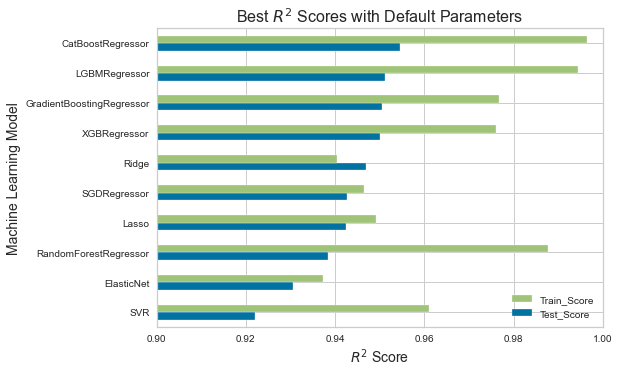

In [506]:
plt.figure(figsize=(12,10))
# fig, ax = plt.subplots()
ax = TopModelSelectionRefinedLassoRF.sort_values(['Test_Score']).plot(x="ML_type", y=["Test_Score", "Train_Score"], kind="barh", xlim=(0.9,1))
plt.xlabel('$R^2$ Score', size=14)
plt.ylabel('Machine Learning Model', size=14)
plt.title('Best $R^2$ Scores with Default Parameters',size=16)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='lower right')
plt.show()
# reverse order of legend


## Residuals

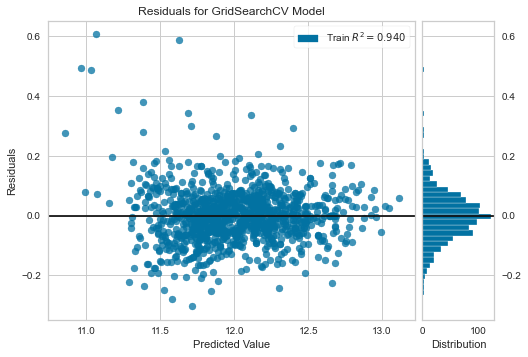

<AxesSubplot:title={'center':'Residuals for GridSearchCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [236]:
from yellowbrick.regressor import ResidualsPlot
visualizer_residuals = ResidualsPlot(ans_ridge_filter_Rscaled_log)
visualizer_residuals.fit(dumX_train_filter_Rscaled, dumy_train_filter_log)
visualizer_residuals.show()

## Partial Dependence Plots

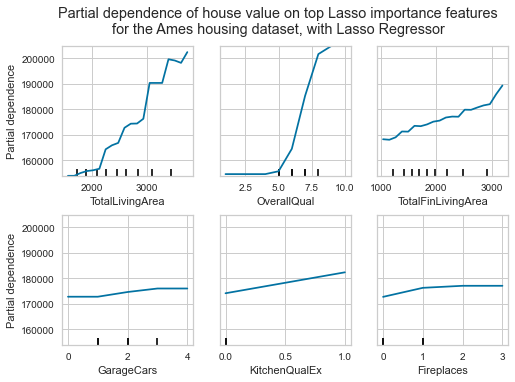

In [649]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

lasso2 = LGBMRegressor(alpha=5, normalize=True)
lasso2.fit(dumX_train_filter_PCA, dumy_train_filter.values.ravel())

features = ['TotalLivingArea',
 'OverallQual',
 'TotalFinLivingArea',
 'GarageCars',
 'KitchenQualEx',
 'Fireplaces']
display = plot_partial_dependence(
       lasso2, dumX_train_filter_PCA, features,# subsample=50, kind="both", 
       n_jobs=-1, grid_resolution=20#, #random_state=42, verbose=2
)

display.figure_.suptitle(
    'Partial dependence of house value on top Lasso importance features\n'
    'for the Ames housing dataset, with Lasso Regressor'
)
display.figure_.subplots_adjust(hspace=0.3)

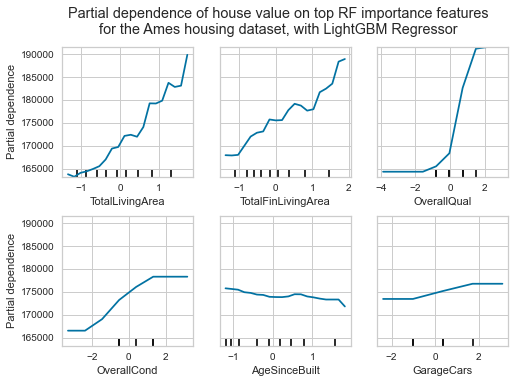

In [641]:
lgbm2 = LGBMRegressor()
lgbm2.fit(dumX_train_filter_scaled_PCA.drop(lasso_droplist_no_PCA, axis=1), dumy_train_filter.values.ravel())
features = ['TotalLivingArea','TotalFinLivingArea','OverallQual','OverallCond','AgeSinceBuilt','GarageCars']
display = plot_partial_dependence(
       lgbm2, dumX_train_filter_scaled_PCA.drop(lasso_droplist_no_PCA, axis=1), features,# subsample=50, kind="both", 
       n_jobs=-1, grid_resolution=20#, #random_state=42, verbose=2

display.figure_.suptitle(
    'Partial dependence of house value on top RF importance features\n'
    'for the Ames housing dataset, with LightGBM Regressor'
)
display.figure_.subplots_adjust(hspace=0.3)

Living Area and Quality are the most important features overall to this model, but Kitchen and Garage quality make an interesting showing. These insights can help one decide where to invest in home renovation before selling, or in what type of housing to build in this market.

# Did HyperTransformation Tuning + Ensembling Work?
Simply put - yes! 

By taking the 7 best models and averaging their price predictions, I got a better RMSE (Root Mean Squared Error) than any one of the 7 models individually. While all 7 models performed well, using Ensembling to gain a consensus for price predictions yielded an outcome closest to the true prices. 

Without any HyperParameter Tuning, my HyperTransformation Tuning method combined with Ensembling was able to get a result in the top 15% of scores.